# Note:

Can we refer to the platonic representation hypothesis as we acquire quite distinct boundaries and directions in terms of reasoning-memorisation duality—It's a result of combination of datasets and models, but generalisation across models. Could it be that the models generally encode these two behaviours as a single direcion? (While the datasets used are just to elicit that representation out of the models)

So representation (in different layers of the models) -> elicitation (combining data with models, i.e., activations)

In [1]:
import torch
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import json
import torch
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.linear_model import LogisticRegression

# 设置随机种子
torch.manual_seed(8888)

save_path = '../reasoning_representations_outputs'


model_hs_cache_dict = {}

model_dict = {
    'Llama-3.2-1B': {'full_name': 'Llama-3.2-1B', 'layer': 16},
    'Llama-3.2-1B-Instruct': {'full_name': 'Llama-3.2-1B', 'layer': 16}, 
            'DeepSeek-R1-Distill-Qwen-1.5B': {'full_name': 'DeepSeek-R1-Distill-Qwen-1.5B', 'layer': 28},

    # 'Meta-Llama-3-8B': {'full_name': 'LLaMA3-8B-base', 'layer': 21},
    # 'gemma-2-9b': {'full_name': 'Gemma2-9B-base', 'layer': 16},
    # 'Mistral-7B-v0.3': {'full_name': 'Mistral-7B-v0.3-base', 'layer': 13},
    # 'OLMo-2-1124-7B': {'full_name': 'OLMo2-7B-base', 'layer': 17},
}

for model_name in model_dict.keys():
    
    loaded_dict = torch.load(os.path.join(save_path, f'{model_name}-base_hs_cache_no_cot_all.pt'))
    # print(loaded_dict)
    model_hs_cache_dict[model_name] = loaded_dict

    

In [2]:
model_hs_cache_dict.keys()

dict_keys(['Llama-3.2-1B', 'Llama-3.2-1B-Instruct', 'DeepSeek-R1-Distill-Qwen-1.5B'])

In [3]:
with open('../dataset/mmlu-pro_600samples.json', 'r', encoding='utf-8') as f:
    sampled_data = json.load(f)

reason_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] > 0.5]
memory_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] <= 0.5]

# other_running_set_name_list = ['popqa', 'gsm_symbolic'] #['gsm8k', 'mgsm', 'popqa', 'ceval_liberal']
other_running_set_name_list = ['popqa', 'gsm8k', 'mgsm', 'popqa', 'ceval_liberal'] #['gsm8k', 'mgsm', '

In [4]:
model_hs_cache_dict['Llama-3.2-1B'].keys(), model_hs_cache_dict['DeepSeek-R1-Distill-Qwen-1.5B'].keys()

(dict_keys(['ceval_liberal', 'gsm8k', 'mgsm', 'popqa', 'mmlu-pro_3000', 'mmlu-pro_600', 'human_eval', 'mbpp', 'gsm_symbolic']),
 dict_keys(['ceval_liberal', 'gsm8k', 'mgsm', 'popqa', 'human_eval', 'mbpp', 'mmlu-pro_600', 'mmlu-pro_3000', 'gsm_symbolic']))

len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400


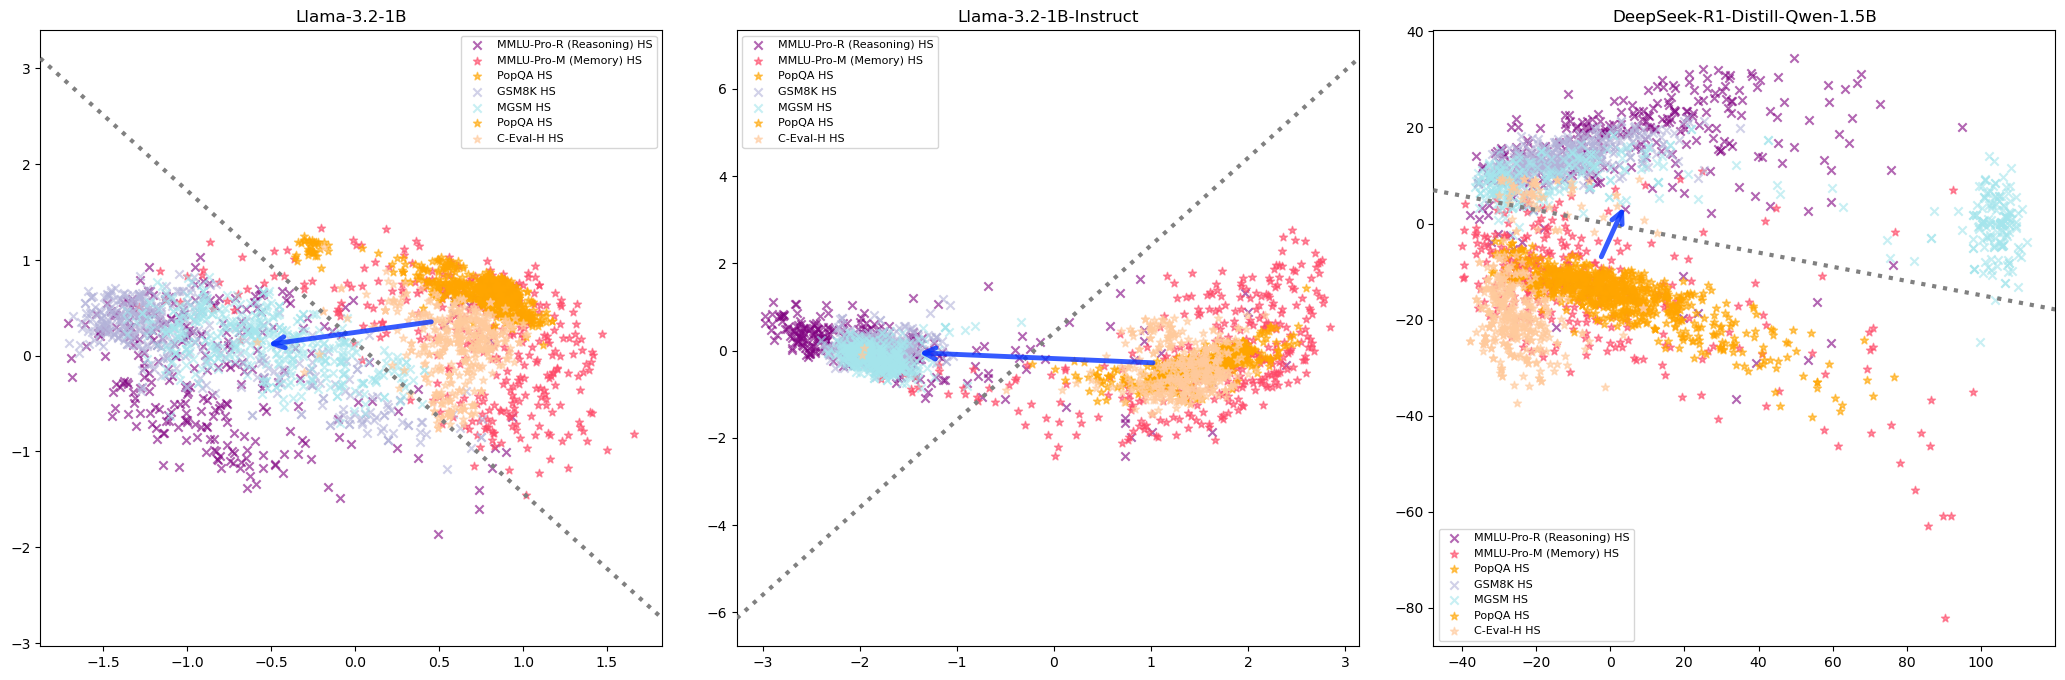

In [7]:

# 创建1x3的图表布局，增加整体图形的宽度
fig, axes = plt.subplots(1, 3, figsize=(26, 8))  # 增加了figsize的宽度

colors_shapes_dict = {
    'mmlu-pro_reason': ['purple','x'], ##2921A2 ##1C1771 #000080
    'mmlu-pro_memory': ['#FE4867', '*'], ##F85070 #FE4867 #B0573C
    'ceval_liberal': ['#FFCA9C', '*', 'C-Eval-H'],
    'gsm8k': ['#B3B3D9', 'x', 'GSM8K'],
    'mgsm': ['#A4E5EC', 'x', 'MGSM'],
    'mbpp': ['blue', 'x', 'MBPP'],
    'popqa': ['orange', '*', 'PopQA'],
    'gsm_symbolic': ['#000080', 'x', 'GSM-Symbolic'],
}

model_dict = {
    'Llama-3.2-1B': {'full_name': 'Llama-3.2-1B', 'layer': 6}, 
    'Llama-3.2-1B-Instruct': {'full_name': 'Llama-3.2-1B-Instruct', 'layer': 10}, 
    'DeepSeek-R1-Distill-Qwen-1.5B': {'full_name': 'DeepSeek-R1-Distill-Qwen-1.5B', 'layer': 23},
    # 'Meta-Llama-3-8B': {'full_name': 'LLaMA3-8B-base', 'layer': 21},
    # 'gemma-2-9b': {'full_name': 'Gemma2-9B-base', 'layer': 16},
    # 'Mistral-7B-v0.3': {'full_name': 'Mistral-7B-v0.3-base', 'layer': 13},
    # 'OLMo-2-1124-7B': {'full_name': 'OLMo2-7B-base', 'layer': 17},
}

# 处理每个模型的数据并绘图
for idx, model_name in enumerate(model_dict.keys()):
    
    hs_cache_no_cot_other_all = model_hs_cache_dict[model_name]
    
    mmlu_pro_hs = hs_cache_no_cot_other_all['mmlu-pro_600']
    
    mmlu_pro_hs_layer = mmlu_pro_hs[model_dict[model_name]['layer']]  
    mmlu_pro_hs_layer_flattened = mmlu_pro_hs_layer.squeeze(1)  

    pca_no_cot = PCA(n_components=2)
    hs_no_cot_pca = pca_no_cot.fit_transform(mmlu_pro_hs_layer_flattened.cpu().numpy()) #模型每一层都有自己的空间
    
    
    # 在对应的子图上绘制
    ax = axes[idx]

    ax.scatter(hs_no_cot_pca[reason_indices, 0], hs_no_cot_pca[reason_indices, 1], color=colors_shapes_dict['mmlu-pro_reason'][0], marker=colors_shapes_dict['mmlu-pro_reason'][1], label='MMLU-Pro-R (Reasoning) HS', alpha=0.6)
    ax.scatter(hs_no_cot_pca[memory_indices, 0], hs_no_cot_pca[memory_indices, 1], color=colors_shapes_dict['mmlu-pro_memory'][0], marker=colors_shapes_dict['mmlu-pro_memory'][1], label='MMLU-Pro-M (Memory) HS', alpha=0.6)

    reason_part = hs_no_cot_pca[reason_indices]
    memory_part = hs_no_cot_pca[memory_indices]
    
    print('len(reason_part): ',len(reason_part))
    print('len(memory_part): ',len(memory_part))
    
    for ix, name in enumerate(other_running_set_name_list):
        
        other_hs_no_cot = hs_cache_no_cot_other_all[name][model_dict[model_name]['layer']]
        
        num_samples = 400
        random_indices = torch.randint(0, other_hs_no_cot.shape[0], (num_samples,))
        other_hs_no_cot = other_hs_no_cot[random_indices]


        print('len(other_hs_no_cot): ',len(other_hs_no_cot))
        other_hs_no_cot_pca = pca_no_cot.transform(other_hs_no_cot.cpu().numpy())
#         ax.scatter(other_hs_no_cot_pca[:, 0], other_hs_no_cot_pca[:, 1], color=colors_shapes_dict[name][0], marker=colors_shapes_dict[name][1], label=f'{colors_shapes_dict[name][2]} HS', alpha=0.6)
        ax.scatter(other_hs_no_cot_pca[:, 0], other_hs_no_cot_pca[:, 1], color=colors_shapes_dict[name][0], marker=colors_shapes_dict[name][1], label=f'{colors_shapes_dict[name][2]} HS', alpha=0.6)

        if name in ['gsm8k', 'mgsm']:
            reason_part = np.vstack((reason_part, other_hs_no_cot_pca))
        else:
            memory_part = np.vstack((memory_part, other_hs_no_cot_pca))
     
    
    
    # logic regression
    # 合并数据和创建标签
    X = np.vstack((reason_part, memory_part))
    y = np.array([0]*len(reason_part) + [1]*len(memory_part))
    # 训练逻辑回归模型
    lr = LogisticRegression()
    lr.fit(X, y)
    # 获取决策边界参数
    coef = lr.coef_[0]
    intercept = lr.intercept_
    # 生成边界线的x范围
    x_min, x_max = ax.get_xlim()
    x_values = np.linspace(x_min, x_max, 100)
    y_values = (-(intercept + coef[0] * x_values)) / coef[1]

    # 绘制黑色点状决策边界
    ax.plot(x_values, y_values, 
     linestyle=':', 
     color='gray', 
     linewidth=3,  # 推荐使用1.5-2.5之间的值
     zorder=3)

    memory_mean = np.mean(memory_part, axis=0)
    reason_mean = np.mean(reason_part, axis=0)

    # 绘制箭头（参数可根据需要调整）
    ax.annotate("", 
         xy=reason_mean,  
         xytext=memory_mean,  
         arrowprops=dict(arrowstyle="->",
                         # color="gray",
                         color = "#0432FF",
                         lw=3.5,          # 加粗线宽（原1.5）
                         linestyle="-",
                         alpha=0.8,
                         mutation_scale=20,  # 增大箭头头部尺寸
                         shrinkA=30,       # 起点端收缩量
                         shrinkB=30),      # 终点端收缩量
         )

    # 添加标签和标题
    ax.set_title(f"{model_dict[model_name]['full_name']}")
    ax.legend(fontsize=8)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(ax.get_ylim())
    

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.12)  # 增加了子图之间的水平间距

# 保存为PDF

plt.savefig('_3model_memory_reason_pca_comparison.pdf', format='pdf', bbox_inches='tight', dpi=300)

# 显示图表
plt.show()

In [6]:
model_dict

{'Llama-3.2-1B': {'full_name': 'Llama-3.2-1B', 'layer': 6},
 'Llama-3.2-1B-Instruct': {'full_name': 'Llama-3.2-1B-Instruct', 'layer': 6},
 'DeepSeek-R1-Distill-Qwen-1.5B': {'full_name': 'DeepSeek-R1-Distill-Qwen-1.5B',
  'layer': 23}}

**Showing in one heuristic layer, the 2 principle components (one dimensionlatiy reduction trick, could be use UMAP as well)**

The arrow is a subtraction between means of resoning part and memorisation part, respectively calculated using dataset's predefined category ('gsm8k', 'mgsm') for reasoning, but not according to the logistic regression result.

# PCA for Coding

len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400
len(reason_part):  274
len(memory_part):  326
len(other_hs_no_cot):  400
len(other_hs_no_cot):  400


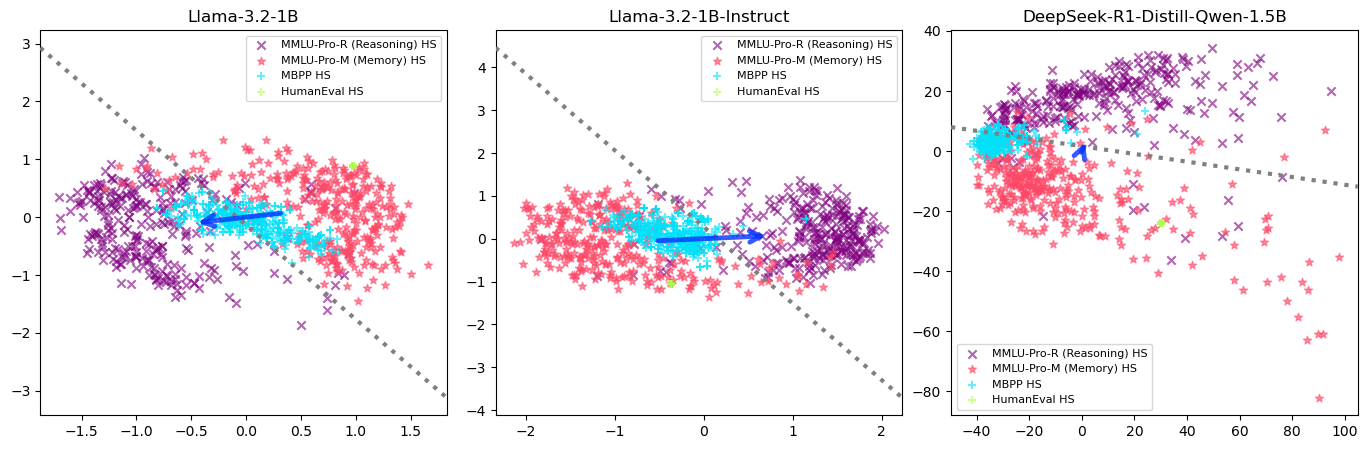

In [8]:

# 创建1x4的图表布局，增加整体图形的宽度
fig, axes = plt.subplots(1, 3, figsize=(17, 5))  # 增加了figsize的宽度

colors_shapes_dict = {
    'mmlu-pro_reason': ['purple','x'], ##2921A2 ##1C1771 #000080
    'mmlu-pro_memory': ['#FE4867', '*'], ##F85070 #FE4867 #B0573C
    'ceval_liberal': ['#FFCA9C', '*', 'C-Eval-H'],
    'gsm8k': ['#B3B3D9', 'x', 'GSM8K'],
    'mgsm': ['#A4E5EC', 'x', 'MGSM'],
    'mbpp': ['#00E1FA', '+', 'MBPP'],
    'human_eval': ['#ADFF49', '+', 'HumanEval'], #BCBD26 E4E5A8 ADFF49 4CFFAA
    'popqa': ['orange', '*', 'PopQA']
}

model_dict = {
        'Llama-3.2-1B': {'full_name': 'Llama-3.2-1B', 'layer': 6}, 
    'Llama-3.2-1B-Instruct': {'full_name': 'Llama-3.2-1B-Instruct', 'layer': 6}, 
    'DeepSeek-R1-Distill-Qwen-1.5B': {'full_name': 'DeepSeek-R1-Distill-Qwen-1.5B', 'layer': 23},
    # 'Meta-Llama-3-8B': {'full_name': 'LLaMA3-8B-base', 'layer': 21},
    # 'gemma-2-9b': {'full_name': 'Gemma2-9B-base', 'layer': 16},
    # 'Mistral-7B-v0.3': {'full_name': 'Mistral-7B-v0.3-base', 'layer': 13},
    # 'OLMo-2-1124-7B': {'full_name': 'OLMo2-7B-base', 'layer': 17},
}

other_running_set_name_list = ['mbpp', 'human_eval']

# 处理每个模型的数据并绘图
for idx, model_name in enumerate(model_dict.keys()):
    
    
    hs_cache_no_cot_other_all = model_hs_cache_dict[model_name]
    
    mmlu_pro_hs = hs_cache_no_cot_other_all['mmlu-pro_600']
    
    mmlu_pro_hs_layer = mmlu_pro_hs[model_dict[model_name]['layer']]  
    mmlu_pro_hs_layer_flattened = mmlu_pro_hs_layer.squeeze(1)  

    pca_no_cot = PCA(n_components=2)
    hs_no_cot_pca = pca_no_cot.fit_transform(mmlu_pro_hs_layer_flattened.cpu().numpy()) #模型每一层都有自己的空间
    
    
    # 在对应的子图上绘制
    ax = axes[idx]

    ax.scatter(hs_no_cot_pca[reason_indices, 0], hs_no_cot_pca[reason_indices, 1], color=colors_shapes_dict['mmlu-pro_reason'][0], marker=colors_shapes_dict['mmlu-pro_reason'][1], label='MMLU-Pro-R (Reasoning) HS', alpha=0.6)
    ax.scatter(hs_no_cot_pca[memory_indices, 0], hs_no_cot_pca[memory_indices, 1], color=colors_shapes_dict['mmlu-pro_memory'][0], marker=colors_shapes_dict['mmlu-pro_memory'][1], label='MMLU-Pro-M (Memory) HS', alpha=0.6)

    reason_part = hs_no_cot_pca[reason_indices]
    memory_part = hs_no_cot_pca[memory_indices]
    
    print('len(reason_part): ',len(reason_part))
    print('len(memory_part): ',len(memory_part))
    
    for ix, name in enumerate(other_running_set_name_list):

        other_hs_no_cot = hs_cache_no_cot_other_all[name][model_dict[model_name]['layer']]
        
        num_samples = 400
        random_indices = torch.randint(0, other_hs_no_cot.shape[0], (num_samples,))
        other_hs_no_cot = other_hs_no_cot[random_indices]


        print('len(other_hs_no_cot): ',len(other_hs_no_cot))
        other_hs_no_cot_pca = pca_no_cot.transform(other_hs_no_cot.cpu().numpy())
        ax.scatter(other_hs_no_cot_pca[:, 0], other_hs_no_cot_pca[:, 1], color=colors_shapes_dict[name][0], marker=colors_shapes_dict[name][1], label=f'{colors_shapes_dict[name][2]} HS', alpha=0.6)
        
        # if name in ['gsm8k', 'mgsm']:
        #     reason_part = np.vstack((reason_part, other_hs_no_cot_pca))
        # else:
        #     memory_part = np.vstack((memory_part, other_hs_no_cot_pca))
             
    
    
    # logic regression
    # 合并数据和创建标签
    X = np.vstack((reason_part, memory_part))
    y = np.array([0]*len(reason_part) + [1]*len(memory_part))
    # 训练逻辑回归模型
    lr = LogisticRegression()
    lr.fit(X, y)
    # 获取决策边界参数
    coef = lr.coef_[0]
    intercept = lr.intercept_
    # 生成边界线的x范围
    x_min, x_max = ax.get_xlim()
    x_values = np.linspace(x_min, x_max, 100)
    y_values = (-(intercept + coef[0] * x_values)) / coef[1]

    # 绘制黑色点状决策边界
    ax.plot(x_values, y_values, 
     linestyle=':', 
     color='gray', 
     linewidth=3,  # 推荐使用1.5-2.5之间的值
     zorder=3)

    memory_mean = np.mean(memory_part, axis=0)
    reason_mean = np.mean(reason_part, axis=0)

    # 绘制箭头（参数可根据需要调整）
    ax.annotate("", 
         xy=reason_mean,  
         xytext=memory_mean,  
         arrowprops=dict(arrowstyle="->",
                         # color="gray",
                         color = "#0432FF",
                         lw=3.5,          # 加粗线宽（原1.5）
                         linestyle="-",
                         alpha=0.8,
                         mutation_scale=20,  # 增大箭头头部尺寸
                         shrinkA=30,       # 起点端收缩量
                         shrinkB=30),      # 终点端收缩量
         )

    # 添加标签和标题
    ax.set_title(f"{model_dict[model_name]['full_name']}")
    ax.legend(fontsize=8)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(ax.get_ylim())
    

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.12)  # 增加了子图之间的水平间距

# 保存为PDF

plt.savefig('3model_memory_reason_pca_for_coding.pdf', format='pdf', bbox_inches='tight', dpi=300)

# 显示图表
plt.show()

# Consine with LiReFs


In [9]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
import torch
import torch.nn.functional as F


def find_direction(reason_set=None, memory_set=None, layer = None):
    
#     if layer is not None:
#         reason_set_layer = reason_set[layer].to(torch.float64)
#         memory_set_layer = memory_set[layer].to(torch.float64)
        
#         print('reason_set_layer.shape: ', reason_set_layer.shape)
        
#         mean_reason_set_layer = reason_set_layer.mean(dim=-1)
#         mean_memory_set_layer = memory_set_layer.mean(dim=-1)

#         mean_diff = mean_reason_set_layer - mean_memory_set_layer  

    if layer is None:
        reason_set_layer = reason_set.to(torch.float64)
        memory_set_layer = memory_set.to(torch.float64)

        #print('reason_set_layer.shape: ', reason_set_layer.shape)

        mean_reason_set_layer = reason_set_layer.mean(dim=0)
        mean_memory_set_layer = memory_set_layer.mean(dim=0)

        mean_diff = mean_reason_set_layer - mean_memory_set_layer  
    
    return mean_diff
    

# 设置随机种子以确保可重复性
np.random.seed(8888)




model_dict = {
    'Llama-3.2-1B': {'full_name': 'Llama-3.2-1B', 'type': 'base'},
    'Llama-3.2-1B-Instruct': {'full_name': 'Llama-3.2-1B-Instruct', 'type': 'instruct'}, 
    'DeepSeek-R1-Distill-Qwen-1.5B': {'full_name': 'DeepSeek-R1-Distill-Qwen-1.5B', 'type': 'instruct'},
    # 'Meta-Llama-3-8B': {'full_name': 'LLaMA3-8B', 'layer': 21, 'type': 'base'},
    # 'gemma-2-9b': {'full_name': 'Gemma2-9B', 'layer': 16, 'type': 'base'},
    # 'Mistral-7B-v0.3': {'full_name': 'Mistral-7B-v0.3', 'layer': 13, 'type': 'base'},
    # 'olmo2-7b': {'full_name': 'OLMo2-7B', 'layer': 17, 'type': 'base'},
    # 'Meta-Llama-3-8B-Instruct': {'full_name': 'LLaMA3-8B', 'layer': 21, 'type': 'instruct'},
    # 'gemma-2-9b-it': {'full_name': 'Gemma2-9B', 'layer': 16, 'type': 'instruct'},
    # 'Mistral-7B-Instruct-v0.3': {'full_name': 'Mistral-7B-v0.3', 'layer': 13, 'type': 'instruct'},
    # 'olmo-2-1124-7B-Instruct': {'full_name': 'OLMo2-7B', 'layer': 17, 'type': 'instruct'},
}

model_hs_cache_dict = {}
    
cosine_data = {
    'Llama-3.2-1B': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
     'Llama-3.2-1B-Instruct': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
     'DeepSeek-R1-Distill-Qwen-1.5B': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
    # 'LLaMA3-8B': {'reason': [],
    #               'memory': [],
    #               'reason_instruct': [],
    #               'memory_instruct': []},
#     'Gemma2-9B': {'reason': [],
#                   'memory': [],
#                   'reason_instruct': [],
#                   'memory_instruct': []},
#     'Mistral-7B-v0.3': {'reason': [],
#                   'memory': [],
#                   'reason_instruct': [],
#                   'memory_instruct': []},
#     'OLMo2-7B': {'reason': [],
#                   'memory': [],
#                   'reason_instruct': [],
#                   'memory_instruct': []},
}

for model_name in model_dict.keys():
    
    loaded_dict = torch.load(os.path.join(save_path, f'{model_name}-base_hs_cache_no_cot_all.pt'))
    # print(loaded_dict)
    model_hs_cache_dict[model_name] = loaded_dict
    
    for layer in range(len(loaded_dict['mmlu-pro_600'])):

        reason_set = torch.cat((loaded_dict['mmlu-pro_600'][layer][reason_indices], loaded_dict['gsm8k'][layer], loaded_dict['mgsm'][layer]), dim=0)
        memory_set = torch.cat((loaded_dict['mmlu-pro_600'][layer][memory_indices], loaded_dict['ceval_liberal'][layer]), dim=0)

        direction = find_direction(reason_set=reason_set, memory_set=memory_set)
  

        if model_dict[model_name]['type'] == 'base':

            cosine_data[model_dict[model_name]['full_name']]['reason'].append(F.cosine_similarity(reason_set, direction.unsqueeze(0), dim=-1))
            cosine_data[model_dict[model_name]['full_name']]['memory'].append(F.cosine_similarity(memory_set, direction.unsqueeze(0), dim=-1))

        else:

            cosine_data[model_dict[model_name]['full_name']]['reason_instruct'].append(F.cosine_similarity(reason_set, direction.unsqueeze(0), dim=-1))
            cosine_data[model_dict[model_name]['full_name']]['memory_instruct'].append(F.cosine_similarity(memory_set, direction.unsqueeze(0), dim=-1))


In [10]:
cosine_data['Llama-3.2-1B']['reason_instruct'] = cosine_data['Llama-3.2-1B-Instruct']['reason_instruct']
cosine_data['Llama-3.2-1B']['memory_instruct'] = cosine_data['Llama-3.2-1B-Instruct']['memory_instruct']
del cosine_data['Llama-3.2-1B-Instruct']
cosine_data.keys(),cosine_data['Llama-3.2-1B'].keys() 
# modify the dict so base and instruct Llama 3.2 lives in the same item

(dict_keys(['Llama-3.2-1B', 'DeepSeek-R1-Distill-Qwen-1.5B']),
 dict_keys(['reason', 'memory', 'reason_instruct', 'memory_instruct']))

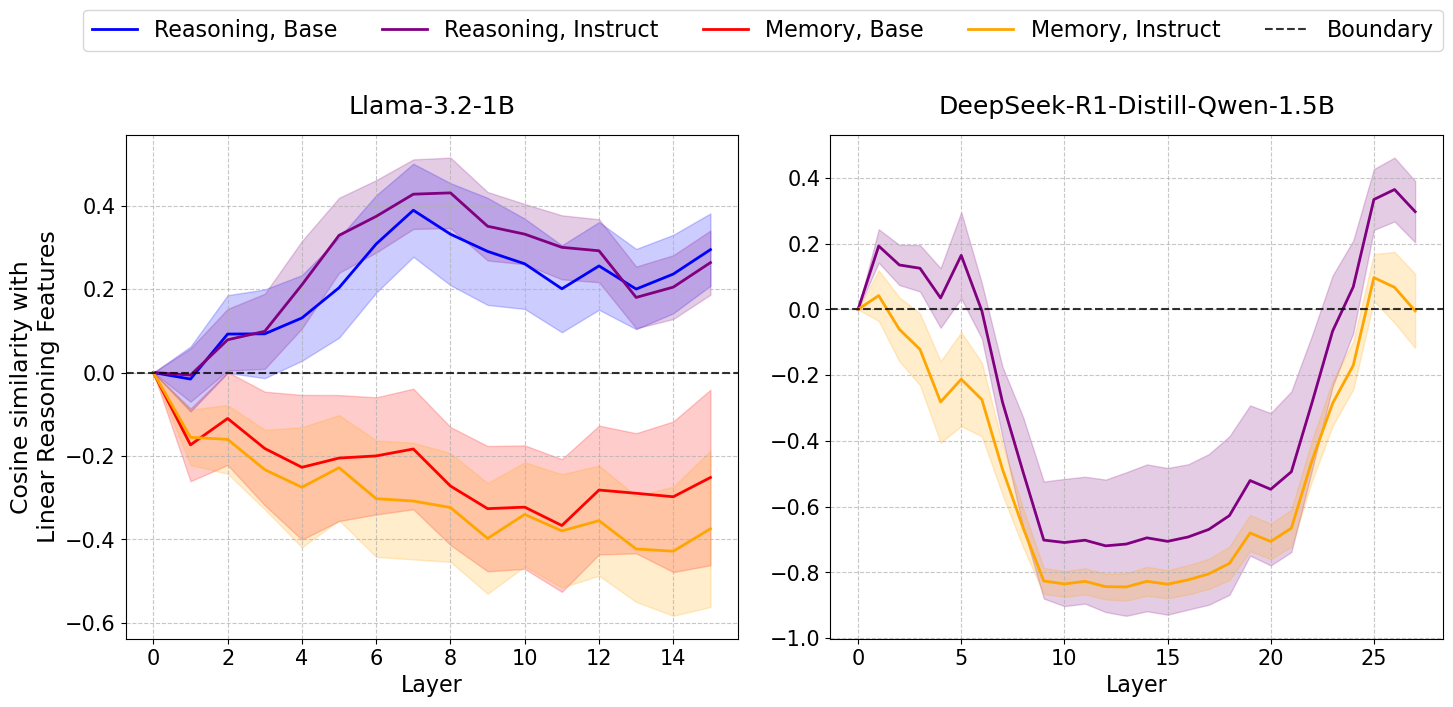

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
model_list = ['Llama-3.2-1B',
#      'Llama-3.2-1B-Instruct', # included in the first model as "instruct"
     'DeepSeek-R1-Distill-Qwen-1.5B',
                # 'LLaMA3-8B', 
#               'Gemma2-9B', 
#               'Mistral-7B-v0.3', 
#               'OLMo2-7B'
             ]
# 为每个子图绘制数据
for idx, ax in enumerate(axes):
    
    # 计算均值和标准差并绘制
    def plot_line_with_ci(layers, data, color, label):
        
        data_tensor = torch.stack(data)
        mean = torch.mean(data_tensor, dim=-1)
        std = torch.std(data_tensor, dim=-1)
        
        ax.plot(layers, mean, color=color, label=label, linewidth=2)
        ax.fill_between(layers, mean-std, mean+std, color=color, alpha=0.2)
        
     
    model_name = model_list[idx]
    if len(cosine_data[model_name]['reason']) != 0:
#         print(len(cosine_data[model_name]['reason']))
        layers = np.arange(0, len(cosine_data[model_name]['reason']), 1) 
        
    else:
#         print(len(cosine_data[model_name]['reason_instruct']))
        layers = np.arange(0, len(cosine_data[model_name]['reason_instruct']), 1)
    
    # 绘制所有线条
    if len(cosine_data[model_name].get('reason', '')) != 0:
        plot_line_with_ci(layers, cosine_data[model_name]['reason'], 'blue', 'Reasoning, Base')
    if len(cosine_data[model_name].get('reason_instruct', '')) != 0:
        plot_line_with_ci(layers, cosine_data[model_name]['reason_instruct'], 'purple', 'Reasoning, Instruct')
    if len(cosine_data[model_name].get('memory', '')) != 0:
        plot_line_with_ci(layers, cosine_data[model_name]['memory'], 'red', 'Memory, Base')
    if len(cosine_data[model_name].get('memory_instruct', '')) != 0:
        plot_line_with_ci(layers, cosine_data[model_name]['memory_instruct'], 'orange', 'Memory, Instruct')

    # 设置图表属性
    ax.set_xlabel('Layer', fontsize=16)
    ax.set_title(model_list[idx], fontsize=18, pad=15)  # 添加标题
    if ax == axes[0]:  # 只在第一个子图显示y轴标签
        ax.set_ylabel('Cosine similarity with\nLinear Reasoning Features', fontsize=17)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=15)
    
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.8, label='Boundary' if idx == 0 else '')
    # ax.set_ylim(0, 0.55)

# 添加共享图例
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',
           bbox_to_anchor=(0.5, 1.05), ncol=5, fontsize=16)

# 调整布局
plt.subplots_adjust(wspace=0.15, bottom=0.25)  # 为图例留出空间

# 保存图表
plt.savefig('model_memory_reason_cosine.pdf', format='pdf', bbox_inches='tight', dpi=300)

# 显示图表
plt.show()

# Cosine between LiReFs and Direction between PopQA and GSM-symbolic


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F


def find_direction(reason_set=None, memory_set=None, layer = None):
    
#     if layer is not None:
#         reason_set_layer = reason_set[layer].to(torch.float64)
#         memory_set_layer = memory_set[layer].to(torch.float64)
        
#         print('reason_set_layer.shape: ', reason_set_layer.shape)
        
#         mean_reason_set_layer = reason_set_layer.mean(dim=-1)
#         mean_memory_set_layer = memory_set_layer.mean(dim=-1)

#         mean_diff = mean_reason_set_layer - mean_memory_set_layer  

    if layer is None:
        reason_set_layer = reason_set.to(torch.float64)
        memory_set_layer = memory_set.to(torch.float64)

        #print('reason_set_layer.shape: ', reason_set_layer.shape)

        mean_reason_set_layer = reason_set_layer.mean(dim=0)
        mean_memory_set_layer = memory_set_layer.mean(dim=0)

        mean_diff = mean_reason_set_layer - mean_memory_set_layer  
    
    return mean_diff
    

# 设置随机种子以确保可重复性
np.random.seed(8888)




model_dict = {
    'Meta-Llama-3-8B': {'full_name': 'LLaMA3-8B', 'layer': 21, 'type': 'base'},
    'gemma-2-9b': {'full_name': 'Gemma2-9B', 'layer': 16, 'type': 'base'},
    'Mistral-7B-v0.3': {'full_name': 'Mistral-7B-v0.3', 'layer': 13, 'type': 'base'},
    'OLMo-2-1124-7B': {'full_name': 'OLMo2-7B', 'layer': 17, 'type': 'base'},
    # 'Meta-Llama-3-8B-Instruct': {'full_name': 'LLaMA3-8B', 'layer': 21, 'type': 'instruct'},
    # 'gemma-2-9b-it': {'full_name': 'Gemma2-9B', 'layer': 16, 'type': 'instruct'},
    # 'Mistral-7B-Instruct-v0.3': {'full_name': 'Mistral-7B-v0.3', 'layer': 13, 'type': 'instruct'},
    # 'olmo-2-1124-7B-Instruct': {'full_name': 'OLMo2-7B', 'layer': 17, 'type': 'instruct'},
}


model_hs_cache_dict = {}
    
cosine_data = {
    'LLaMA3-8B': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
    'Gemma2-9B': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
    'Mistral-7B-v0.3': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
    'OLMo2-7B': {'reason': [],
                  'memory': [],
                  'reason_instruct': [],
                  'memory_instruct': []},
}

for model_name in model_dict.keys():
    
    loaded_dict = torch.load(os.path.join(save_path, f'{model_name}-base_hs_cache_no_cot_all.pt'))
    # print(loaded_dict)
    model_hs_cache_dict[model_name] = loaded_dict
    
    for layer in range(len(loaded_dict['mmlu-pro'])):

        reason_set = loaded_dict['mmlu-pro'][layer][reason_indices]
        memory_set = loaded_dict['mmlu-pro'][layer][memory_indices]

        mmlu_pro_direction = find_direction(reason_set=reason_set, memory_set=memory_set)
        
        reason_set = loaded_dict['gsm_symbolic'][layer]
        memory_set = loaded_dict['popqa'][layer]

        popqa_gsmsymbolic_direction = find_direction(reason_set=reason_set, memory_set=memory_set)
  

        if model_dict[model_name]['type'] == 'base':

            cosine_data[model_dict[model_name]['full_name']]['reason'].append(F.cosine_similarity(popqa_gsmsymbolic_direction.unsqueeze(0), mmlu_pro_direction.unsqueeze(0), dim=-1))
            # cosine_data[model_dict[model_name]['full_name']]['memory'].append(F.cosine_similarity(memory_set, direction.unsqueeze(0), dim=-1))

#         else:

#             cosine_data[model_dict[model_name]['full_name']]['reason_instruct'].append(F.cosine_similarity(reason_set, direction.unsqueeze(0), dim=-1))
#             cosine_data[model_dict[model_name]['full_name']]['memory_instruct'].append(F.cosine_similarity(memory_set, direction.unsqueeze(0), dim=-1))


In [ ]:
# cosine_data

for model_name in model_dict.keys():
    
    print(model_name)
    
    for layer in range(len(loaded_dict['mmlu-pro'])):
        
        if layer % 4 == 0:
            print(cosine_data[model_dict[model_name]['full_name']]['reason'][layer])
         
    list_of_tensors = cosine_data[model_dict[model_name]['full_name']]['reason']
    stacked_tensor = torch.stack(list_of_tensors)
    average_tensor = torch.mean(stacked_tensor, dim=0)
    print('avg: ', average_tensor)


Meta-Llama-3-8B
tensor([0.], dtype=torch.float64)
tensor([0.7288], dtype=torch.float64)
tensor([0.6606], dtype=torch.float64)
tensor([0.6596], dtype=torch.float64)
tensor([0.6431], dtype=torch.float64)
tensor([0.6425], dtype=torch.float64)
tensor([0.6595], dtype=torch.float64)
tensor([0.6611], dtype=torch.float64)
avg:  tensor([0.6358], dtype=torch.float64)
gemma-2-9b
tensor([0.], dtype=torch.float64)
tensor([0.8561], dtype=torch.float64)
tensor([0.7705], dtype=torch.float64)
tensor([0.7213], dtype=torch.float64)
tensor([0.8185], dtype=torch.float64)
tensor([0.7725], dtype=torch.float64)
tensor([0.7494], dtype=torch.float64)
tensor([0.7750], dtype=torch.float64)
avg:  tensor([0.7569], dtype=torch.float64)
Mistral-7B-v0.3
tensor([0.], dtype=torch.float64)
tensor([0.4195], dtype=torch.float64)
tensor([0.6476], dtype=torch.float64)
tensor([0.7410], dtype=torch.float64)
tensor([0.6877], dtype=torch.float64)
tensor([0.6813], dtype=torch.float64)
tensor([0.7011], dtype=torch.float64)
tensor(

# Cosine between PCA Main Components and Mean Diff


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model_dict = {
    'Meta-Llama-3-8B': {},
    'Mistral-7B-v0.3': {}
}

for ix, model_name in enumerate(model_dict.keys()):
    
    loaded_dict = torch.load(os.path.join(save_path, f'{model_name}-base_hs_cache_no_cot_all.pt'))

    
    for layer in range(len(loaded_dict['mmlu-pro'])):
        model_dict[model_name][layer] = []

        # reason_set = torch.cat((loaded_dict['mmlu-pro'][layer][reason_indices], loaded_dict['gsm8k'][layer], loaded_dict['mgsm'][layer]), dim=0)
        # memory_set = torch.cat((loaded_dict['mmlu-pro'][layer][memory_indices], loaded_dict['ceval_liberal'][layer]), dim=0)
        reason_set = loaded_dict['mmlu-pro'][layer][reason_indices]
        memory_set = loaded_dict['mmlu-pro'][layer][memory_indices]

        direction = find_direction(reason_set=reason_set, memory_set=memory_set) # mean diff
        
        #pca
        pca_no_cot = PCA(n_components=10)
        hs_pca = pca_no_cot.fit_transform(torch.cat((reason_set, memory_set), dim=0).cpu().numpy()) #模型每一层都有自己的空间
        
        
        principal_components = pca_no_cot.components_
        for component in principal_components:
            # print('component: ',component)
            model_dict[model_name][layer].append(F.cosine_similarity(torch.tensor(component), direction, dim=-1))

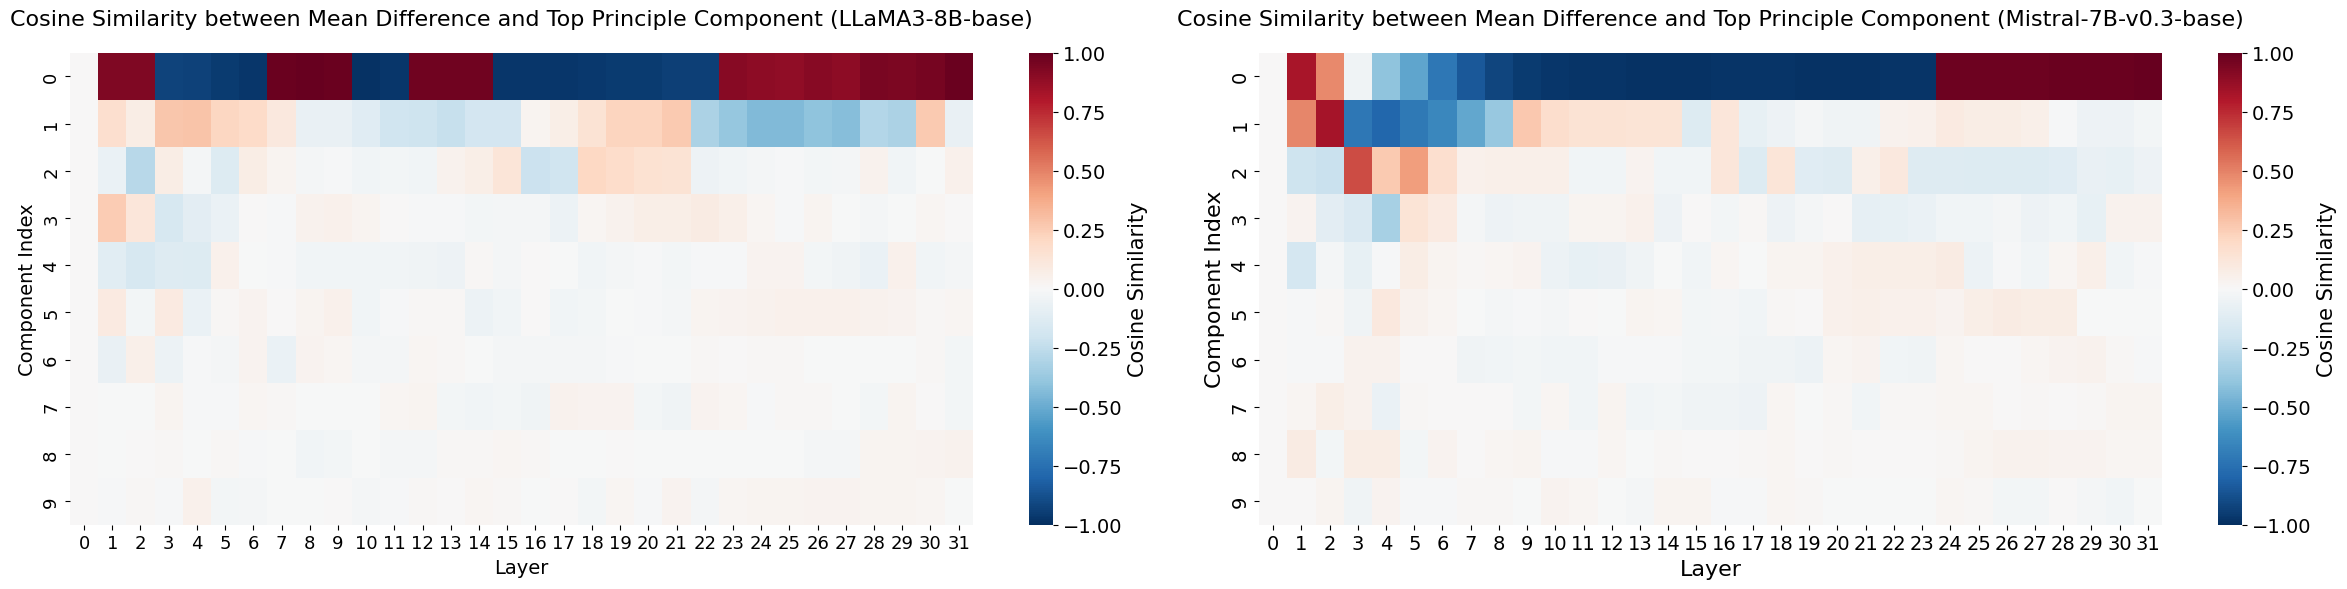

In [ ]:
# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))


data1 = np.array([[tensor.item() for tensor in model_dict['Meta-Llama-3-8B'][i]] for i in range(len(model_dict['Meta-Llama-3-8B']))]).T  
data2 = np.array([[tensor.item() for tensor in model_dict['Mistral-7B-v0.3'][i]] for i in range(len(model_dict['Mistral-7B-v0.3']))]).T
 
# 第一个热力图
sns.heatmap(data1,
            cmap='RdBu_r',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Cosine Similarity'},
            xticklabels=True,
            yticklabels=True,
            ax=ax1)

cbar1 = ax1.collections[0].colorbar
cbar1.set_label('Cosine Similarity', fontsize=15)  # 增大颜色条标签字体大小
cbar1.ax.tick_params(labelsize=14)  # 设置颜色条刻度字体大小

# 设置第一个图的标题和标签
ax1.set_title('Cosine Similarity between Mean Difference and Top Principle Component (LLaMA3-8B-base)', fontsize=16, pad=20)
ax1.set_xlabel('Layer')
ax1.set_ylabel('Component Index')

ax1.set_xlabel('Layer', fontsize=14)
ax1.set_ylabel('Component Index', fontsize=14)
ax1.tick_params(axis='both', labelsize=13)

# 第二个热力图
sns.heatmap(data2,
            cmap='RdBu_r',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Cosine Similarity'},
            xticklabels=True,
            yticklabels=True,
            ax=ax2)

cbar2 = ax2.collections[0].colorbar
cbar2.set_label('Cosine Similarity', fontsize=15)  # 增大颜色条标签字体大小
cbar2.ax.tick_params(labelsize=14)  # 设置颜色条刻度字体大小

# 设置第二个图的标题和标签
ax2.set_title('Cosine Similarity between Mean Difference and Top Principle Component (Mistral-7B-v0.3-base)', fontsize=16, pad=20)

ax2.set_xlabel('Layer', fontsize=16)
ax2.set_ylabel('Component Index', fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

# 调整布局
plt.tight_layout()


plt.savefig('cosine_pca_component_mean_diff.pdf', format='pdf', bbox_inches='tight', dpi=300)

# 显示图形
plt.show()

# Similarity between Reason Score and Projection

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

from scipy.stats import spearmanr


def get_projection(direction, dataset_hs):
    
    # print('dataset_hs.shape: ',dataset_hs.shape)
    dataset_hs = dataset_hs.to(torch.float64)
    
    direction = direction / (direction.norm(dim=-1, keepdim=True) + 1e-8) #direction需要是一个单位向量
    projection_value = dataset_hs @ direction
    
#     print('projection_value.shape: ',projection_value.shape)
    
    
    return projection_value
    

model_dict = {
    'Meta-Llama-3-8B': {},
    'Mistral-7B-v0.3': {}
}

with open('../dataset/mmlu-pro_600samples.json', 'r', encoding='utf-8') as f:
    sampled_data = json.load(f)

reason_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] > 0.5]
memory_indices = [ix for ix, sample in enumerate(sampled_data) if sample['memory_reason_score'] <= 0.5]



for ix, model_name in enumerate(model_dict.keys()):
    
    loaded_dict = torch.load(os.path.join(save_path, f'{model_name}-base_hs_cache_no_cot_all.pt'))

    
    for layer in range(len(loaded_dict['mmlu-pro'])):

        # reason_set = torch.cat((loaded_dict['mmlu-pro'][layer][reason_indices], loaded_dict['gsm8k'][layer], loaded_dict['mgsm'][layer]), dim=0)
        # memory_set = torch.cat((loaded_dict['mmlu-pro'][layer][memory_indices], loaded_dict['ceval_liberal'][layer]), dim=0)
        reason_set = loaded_dict['mmlu-pro'][layer][reason_indices]
        memory_set = loaded_dict['mmlu-pro'][layer][memory_indices]

        direction = find_direction(reason_set=reason_set, memory_set=memory_set) # mean diff
        
        projection = get_projection(direction=direction, dataset_hs=loaded_dict['mmlu-pro'][layer])
        
        model_dict[model_name][layer] = [{"score": s['memory_reason_score'], "projection": p} for s, p in zip(sampled_data, projection)]


Pearson Correlation on Meta-Llama-3-8B in Layer 3: 0.814, p-value: 3.919e-143
Spearman Correlation: 0.802, p-value: 5.047e-136
Pearson Correlation on Mistral-7B-v0.3 in Layer 3: 0.797, p-value: 2.458e-133
Spearman Correlation: 0.808, p-value: 2.531e-139


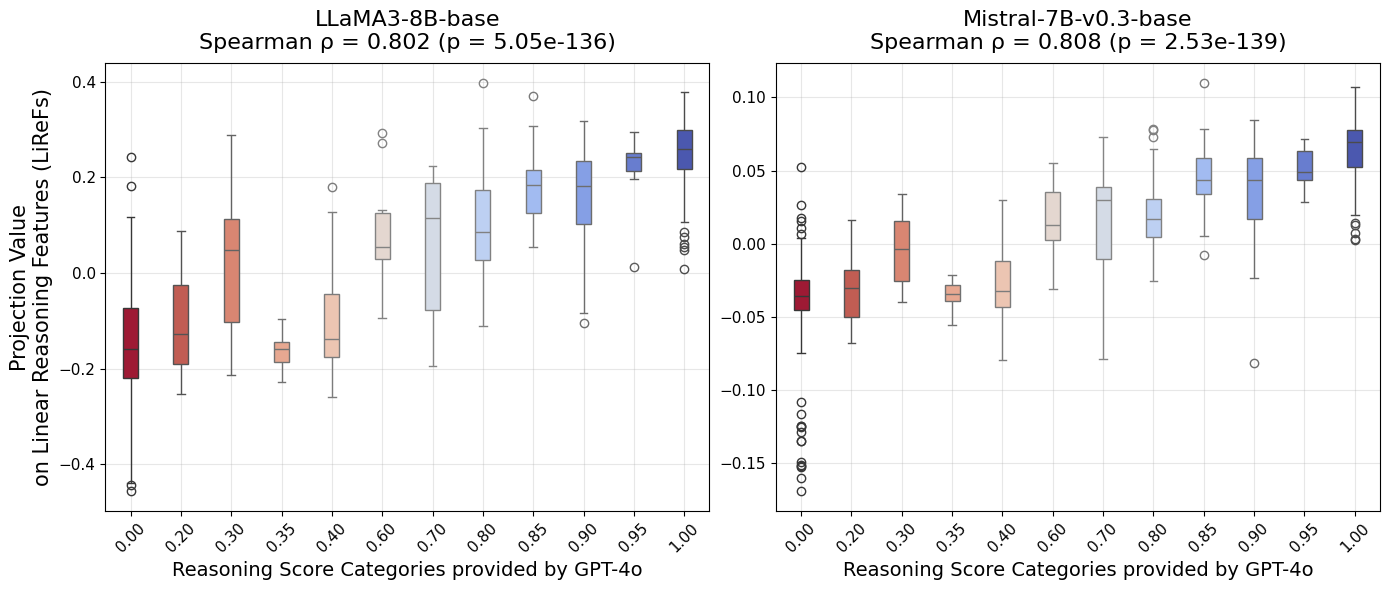

Pearson Correlation on Meta-Llama-3-8B in Layer 4: 0.842, p-value: 2.637e-162
Spearman Correlation: 0.820, p-value: 6.986e-147
Pearson Correlation on Mistral-7B-v0.3 in Layer 4: 0.681, p-value: 4.990e-83
Spearman Correlation: 0.703, p-value: 9.879e-91


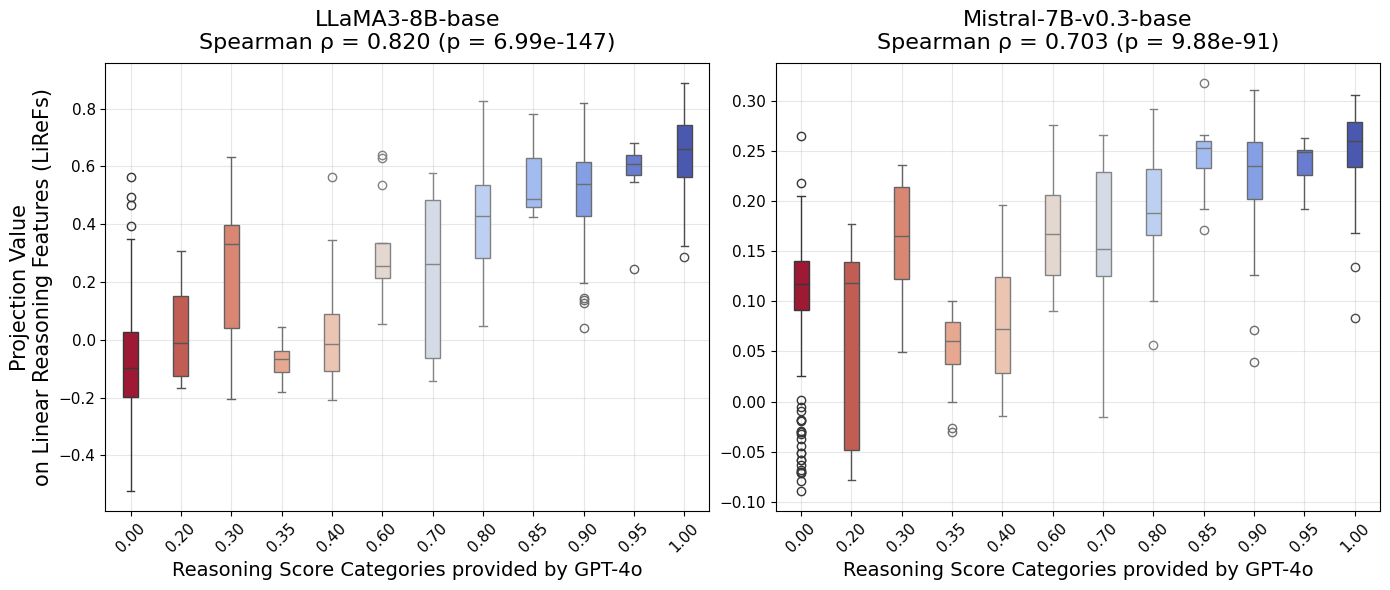

Pearson Correlation on Meta-Llama-3-8B in Layer 5: 0.875, p-value: 3.898e-190
Spearman Correlation: 0.847, p-value: 2.888e-166
Pearson Correlation on Mistral-7B-v0.3 in Layer 5: 0.666, p-value: 3.092e-78
Spearman Correlation: 0.696, p-value: 5.317e-88


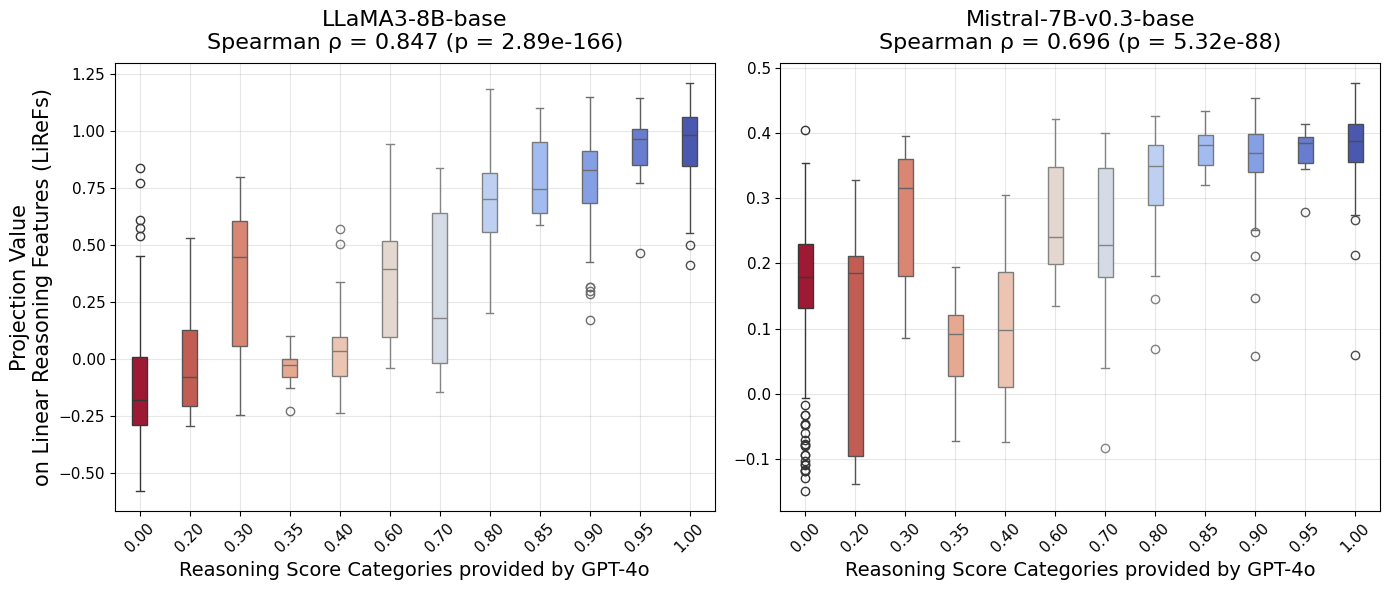

Pearson Correlation on Meta-Llama-3-8B in Layer 6: 0.882, p-value: 4.978e-198
Spearman Correlation: 0.846, p-value: 2.791e-165
Pearson Correlation on Mistral-7B-v0.3 in Layer 6: 0.692, p-value: 1.171e-86
Spearman Correlation: 0.693, p-value: 3.832e-87


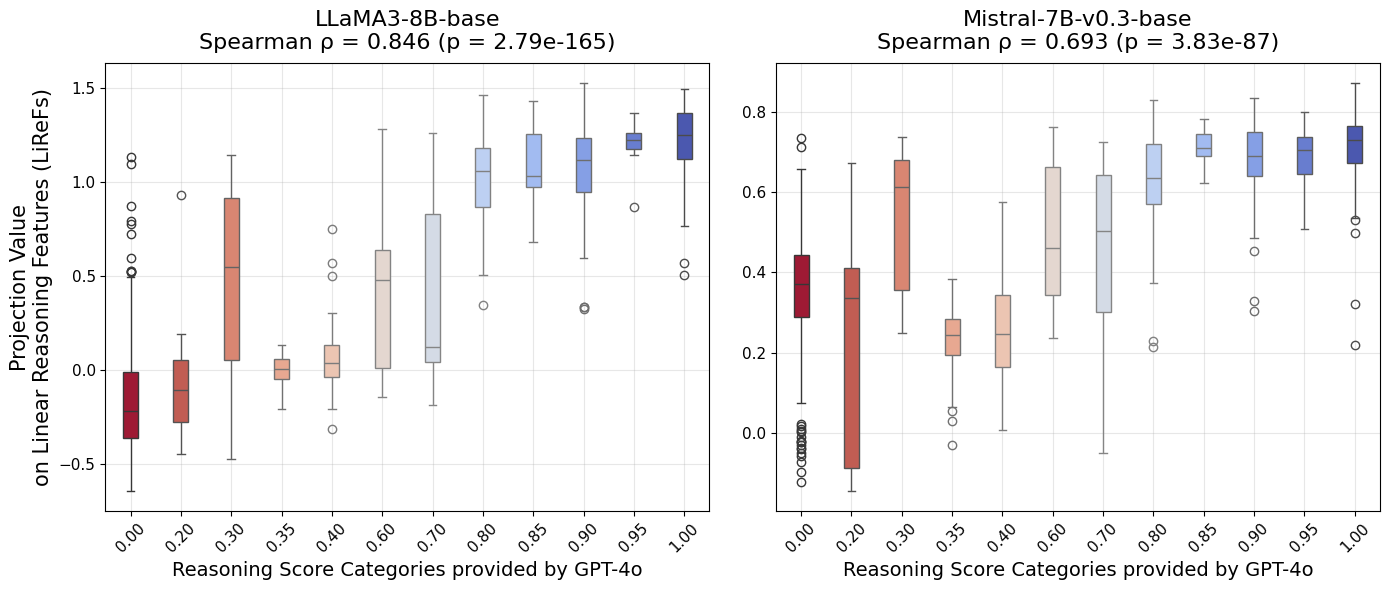

Pearson Correlation on Meta-Llama-3-8B in Layer 7: 0.892, p-value: 3.838e-208
Spearman Correlation: 0.854, p-value: 1.323e-171
Pearson Correlation on Mistral-7B-v0.3 in Layer 7: 0.764, p-value: 4.862e-116
Spearman Correlation: 0.722, p-value: 6.748e-98


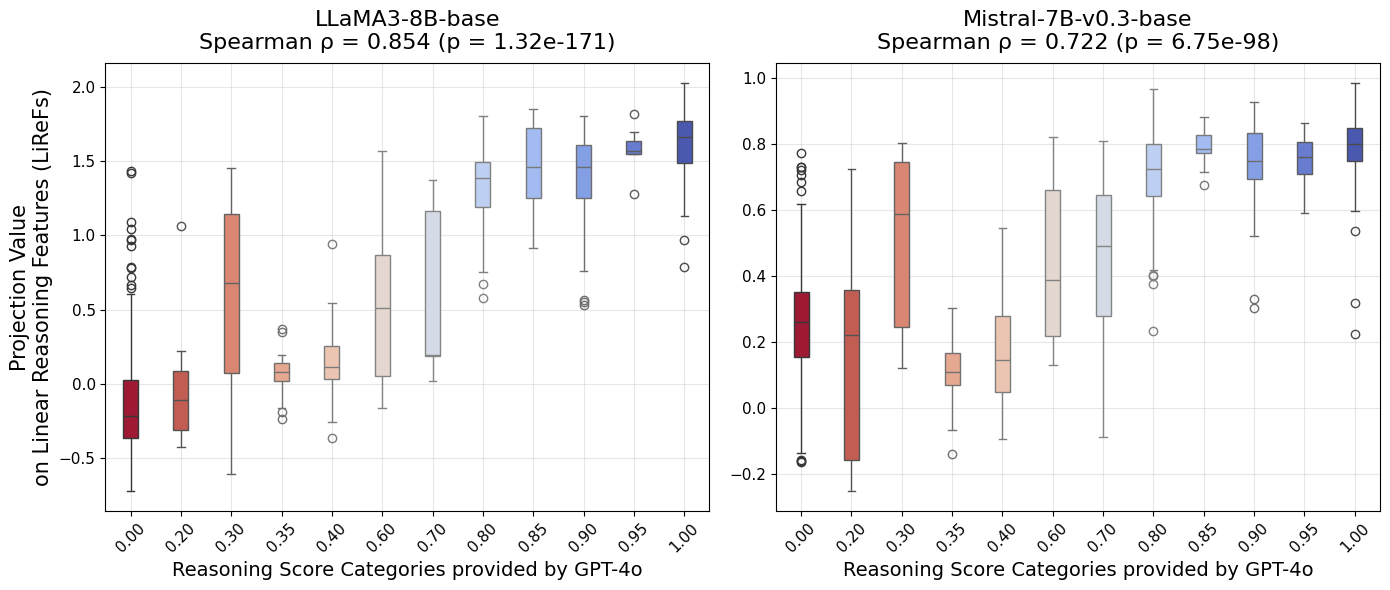

Pearson Correlation on Meta-Llama-3-8B in Layer 8: 0.891, p-value: 2.506e-207
Spearman Correlation: 0.852, p-value: 3.806e-170
Pearson Correlation on Mistral-7B-v0.3 in Layer 8: 0.787, p-value: 1.559e-127
Spearman Correlation: 0.734, p-value: 1.138e-102


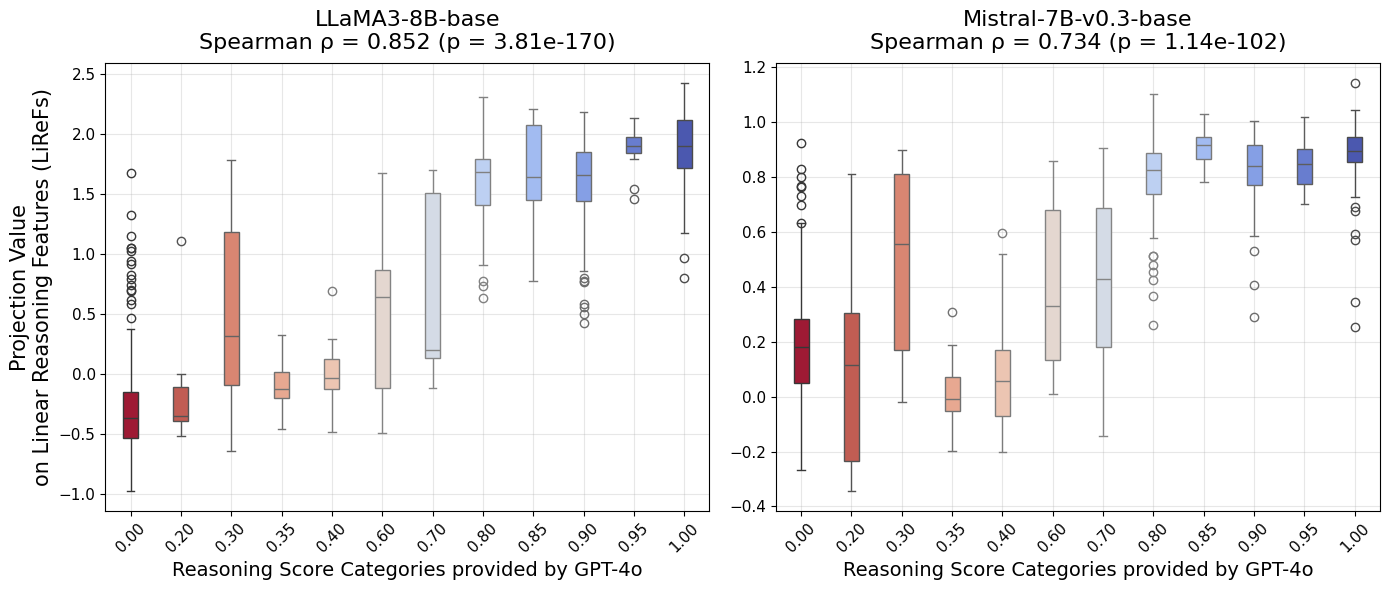

Pearson Correlation on Meta-Llama-3-8B in Layer 9: 0.892, p-value: 4.465e-208
Spearman Correlation: 0.840, p-value: 5.314e-161
Pearson Correlation on Mistral-7B-v0.3 in Layer 9: 0.818, p-value: 1.808e-145
Spearman Correlation: 0.752, p-value: 2.074e-110


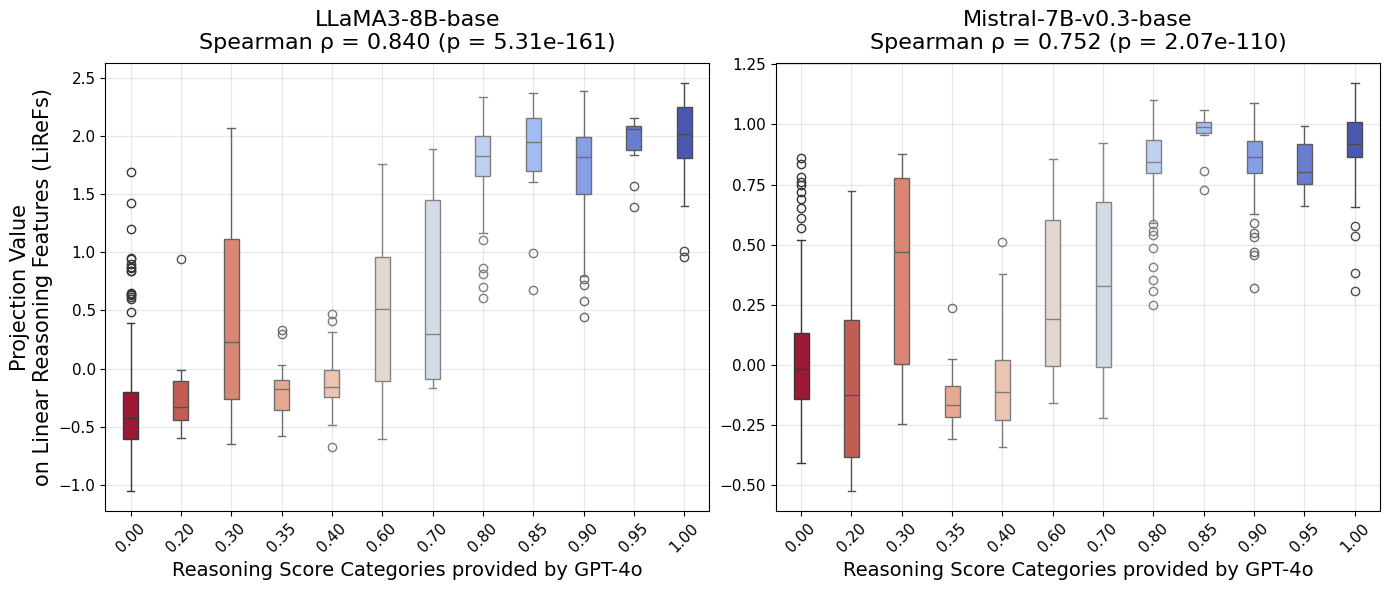

Pearson Correlation on Meta-Llama-3-8B in Layer 10: 0.886, p-value: 2.731e-202
Spearman Correlation: 0.825, p-value: 1.758e-150
Pearson Correlation on Mistral-7B-v0.3 in Layer 10: 0.825, p-value: 1.222e-150
Spearman Correlation: 0.757, p-value: 7.743e-113


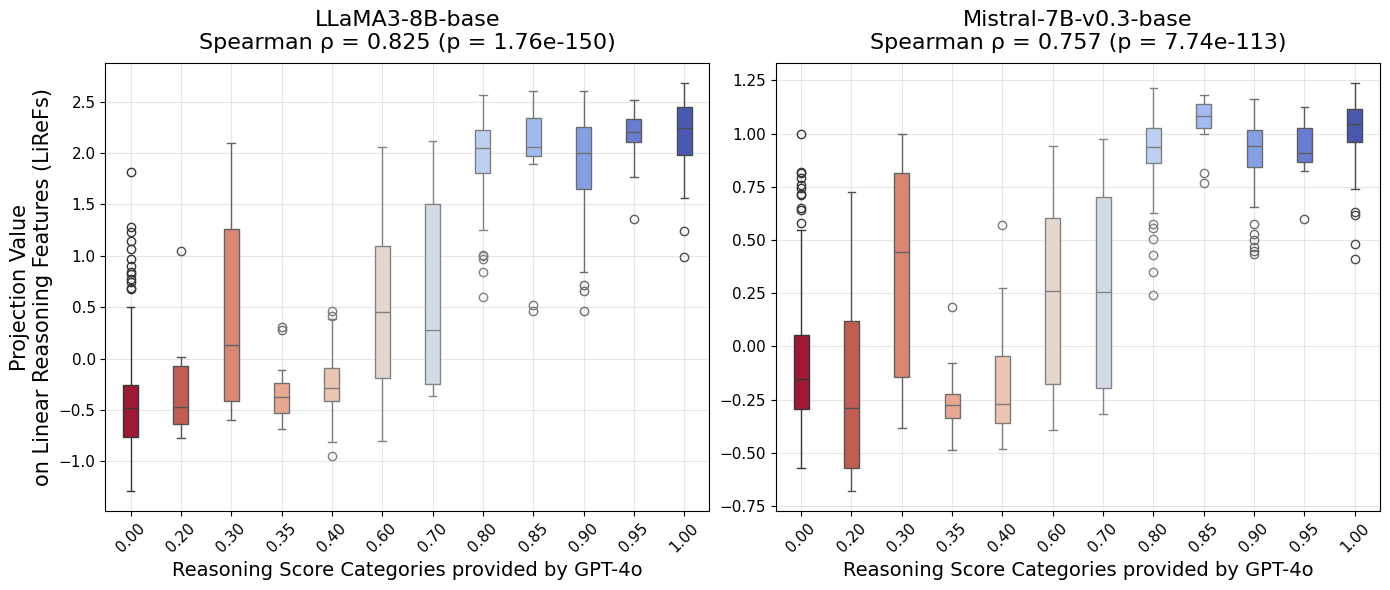

Pearson Correlation on Meta-Llama-3-8B in Layer 11: 0.879, p-value: 1.663e-194
Spearman Correlation: 0.809, p-value: 5.694e-140
Pearson Correlation on Mistral-7B-v0.3 in Layer 11: 0.839, p-value: 5.737e-160
Spearman Correlation: 0.767, p-value: 3.965e-117


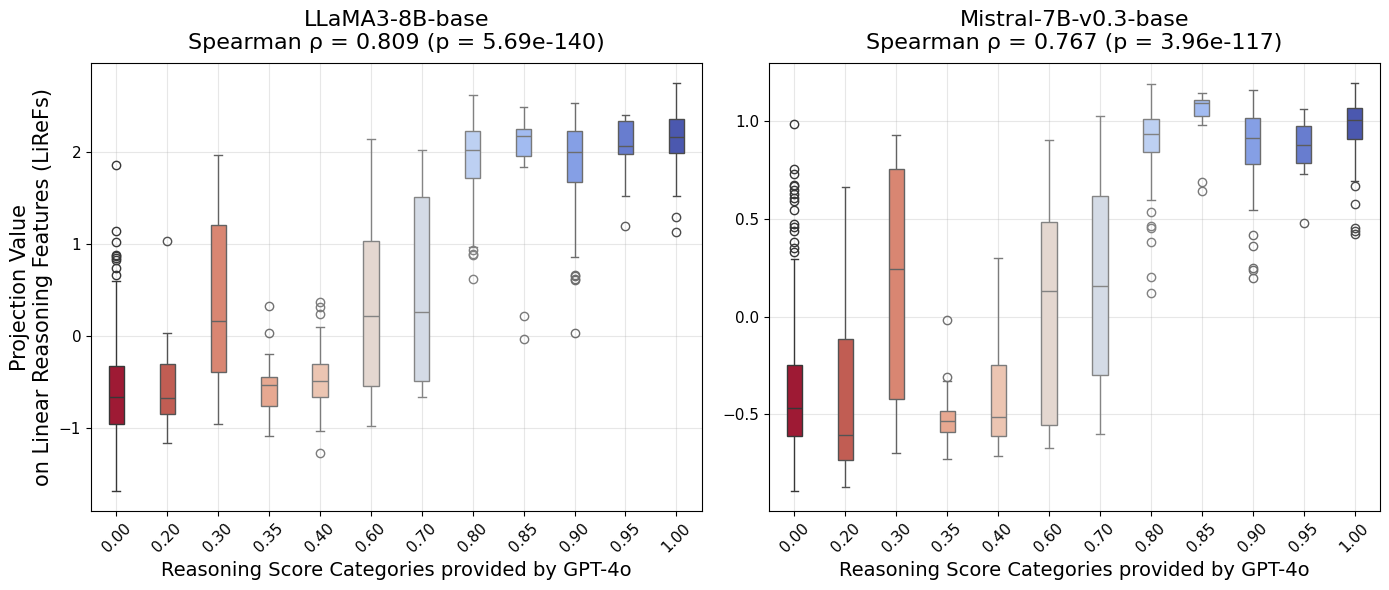

Pearson Correlation on Meta-Llama-3-8B in Layer 12: 0.870, p-value: 2.419e-185
Spearman Correlation: 0.794, p-value: 3.113e-131
Pearson Correlation on Mistral-7B-v0.3 in Layer 12: 0.840, p-value: 5.721e-161
Spearman Correlation: 0.768, p-value: 1.039e-117


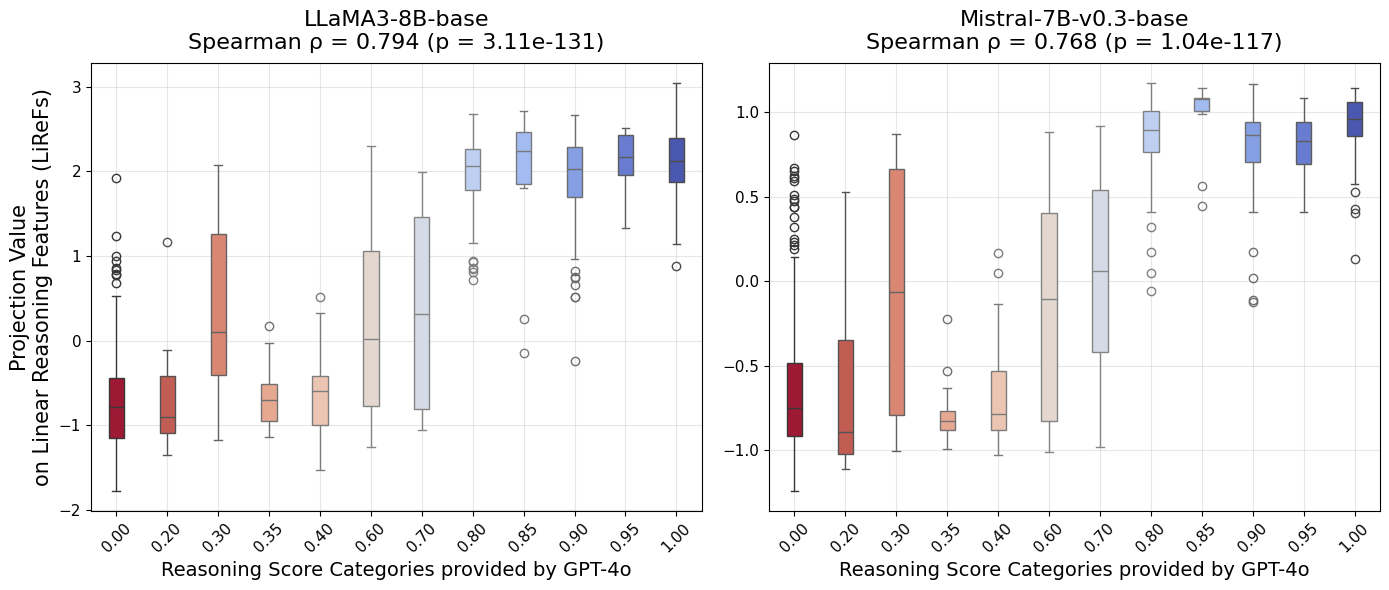

Pearson Correlation on Meta-Llama-3-8B in Layer 13: 0.861, p-value: 1.214e-177
Spearman Correlation: 0.779, p-value: 2.914e-123
Pearson Correlation on Mistral-7B-v0.3 in Layer 13: 0.841, p-value: 1.098e-161
Spearman Correlation: 0.766, p-value: 7.585e-117


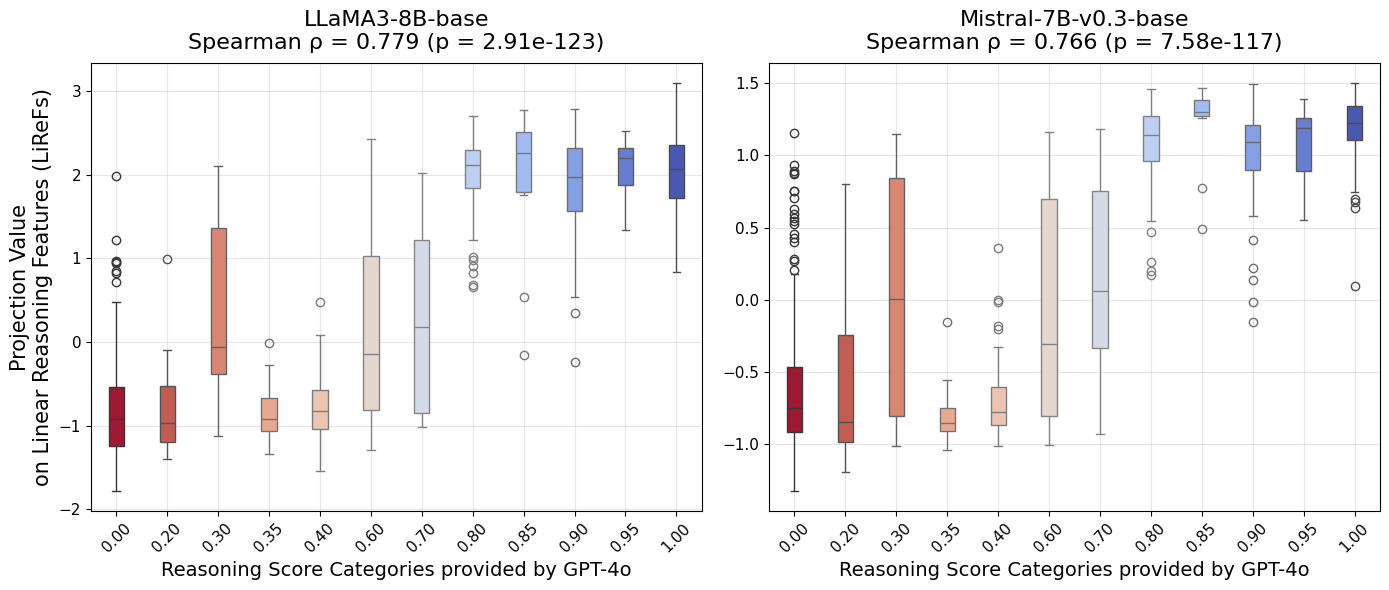

Pearson Correlation on Meta-Llama-3-8B in Layer 14: 0.861, p-value: 1.838e-177
Spearman Correlation: 0.781, p-value: 1.766e-124
Pearson Correlation on Mistral-7B-v0.3 in Layer 14: 0.842, p-value: 1.918e-162
Spearman Correlation: 0.774, p-value: 1.262e-120


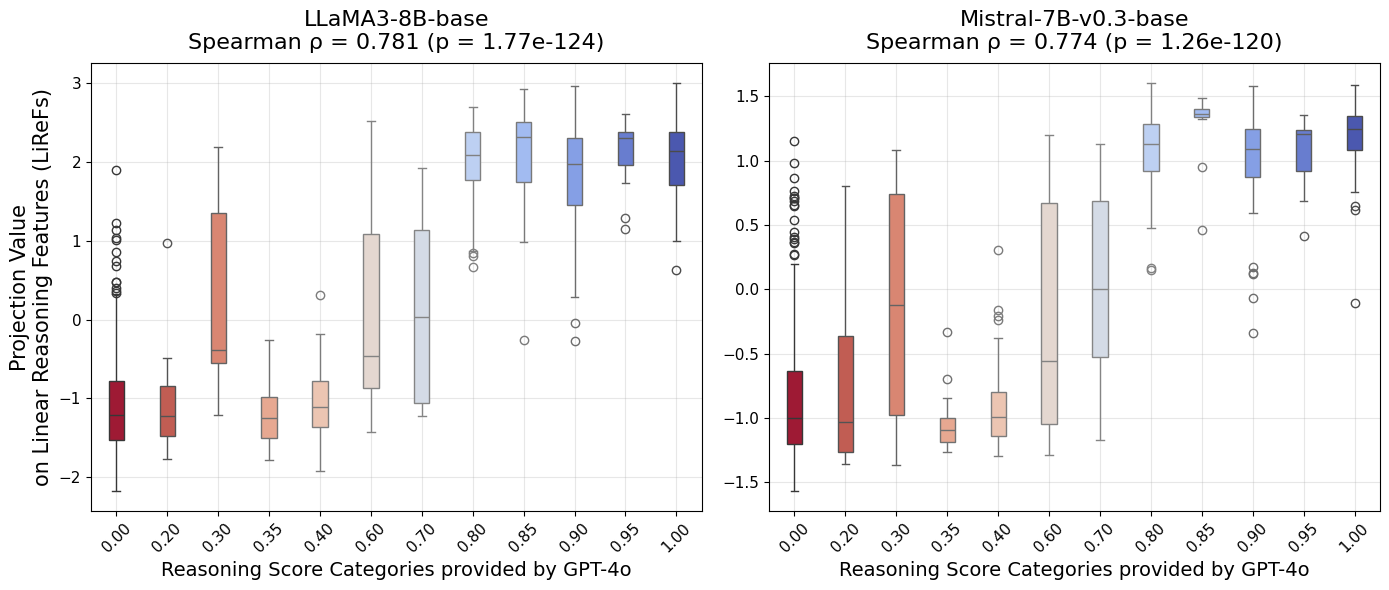

Pearson Correlation on Meta-Llama-3-8B in Layer 15: 0.851, p-value: 2.650e-169
Spearman Correlation: 0.779, p-value: 1.889e-123
Pearson Correlation on Mistral-7B-v0.3 in Layer 15: 0.840, p-value: 7.613e-161
Spearman Correlation: 0.778, p-value: 5.005e-123


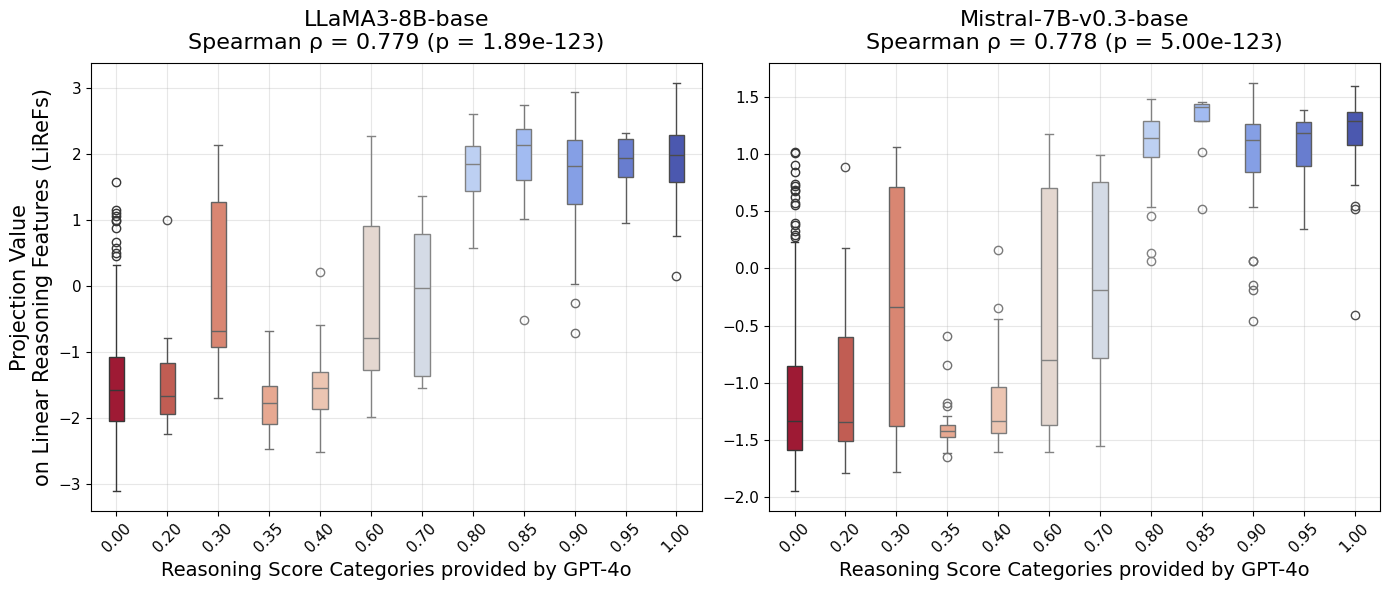

Pearson Correlation on Meta-Llama-3-8B in Layer 16: 0.842, p-value: 1.228e-162
Spearman Correlation: 0.771, p-value: 4.068e-119
Pearson Correlation on Mistral-7B-v0.3 in Layer 16: 0.820, p-value: 3.852e-147
Spearman Correlation: 0.769, p-value: 4.215e-118


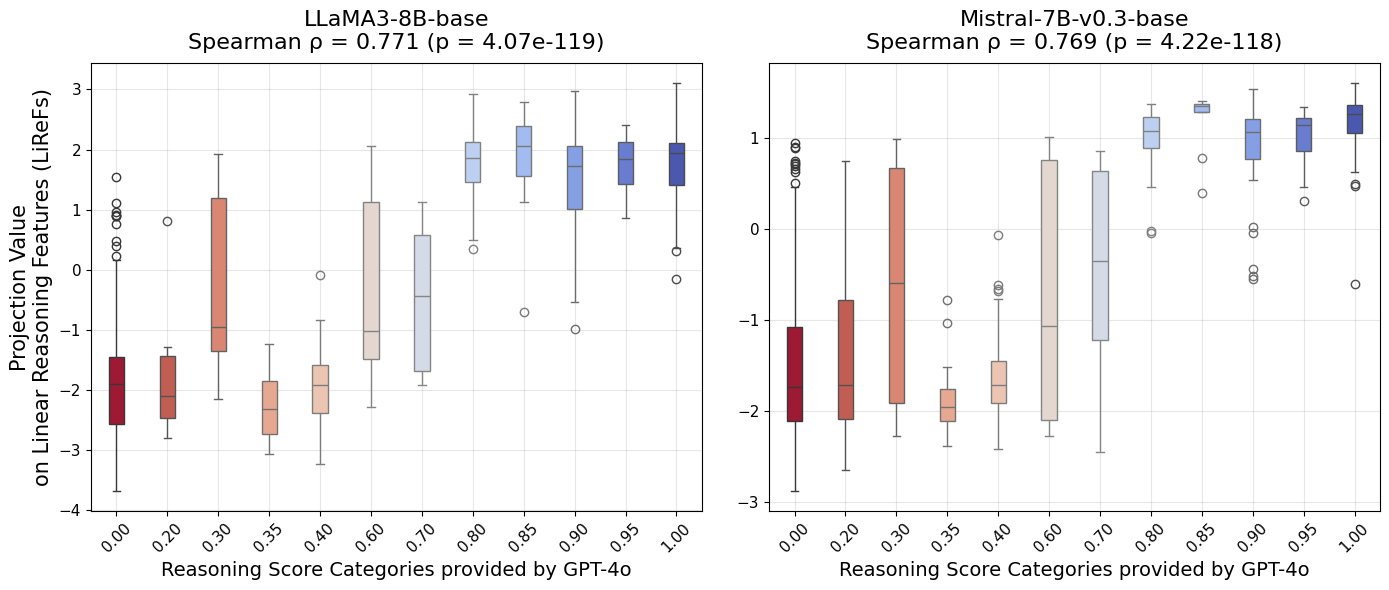

Pearson Correlation on Meta-Llama-3-8B in Layer 17: 0.842, p-value: 2.186e-162
Spearman Correlation: 0.775, p-value: 2.725e-121
Pearson Correlation on Mistral-7B-v0.3 in Layer 17: 0.821, p-value: 1.912e-147
Spearman Correlation: 0.767, p-value: 2.554e-117


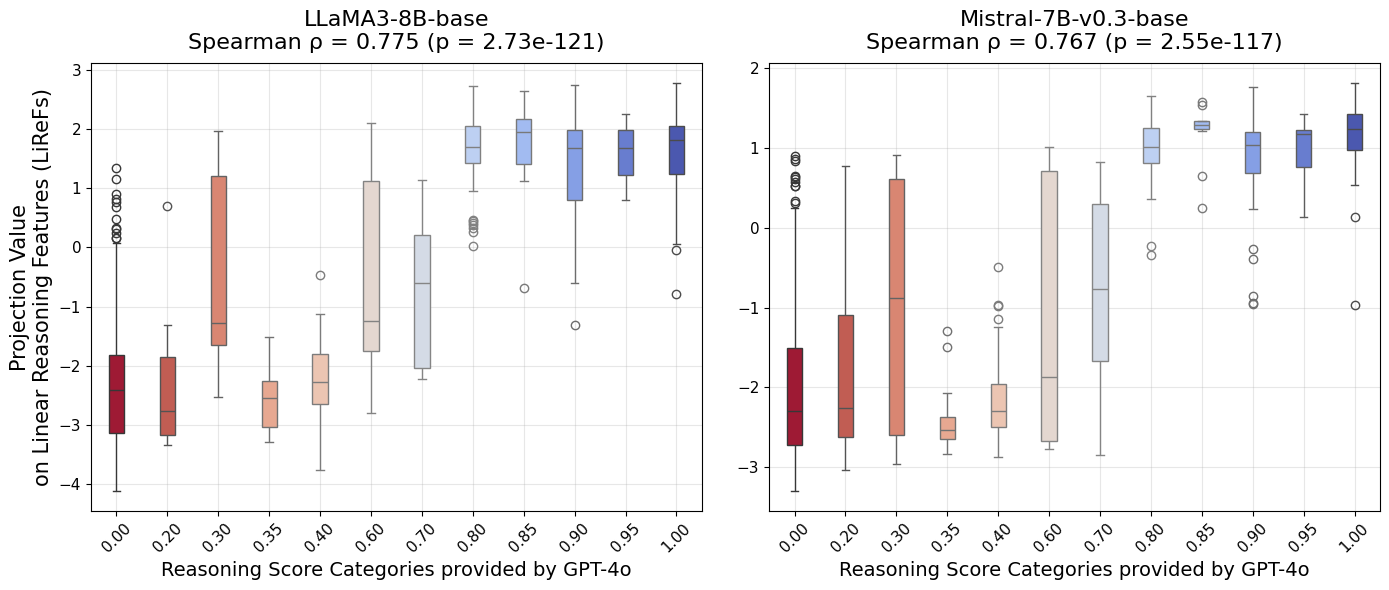

Pearson Correlation on Meta-Llama-3-8B in Layer 18: 0.838, p-value: 1.804e-159
Spearman Correlation: 0.776, p-value: 6.269e-122
Pearson Correlation on Mistral-7B-v0.3 in Layer 18: 0.817, p-value: 8.321e-145
Spearman Correlation: 0.769, p-value: 1.559e-118


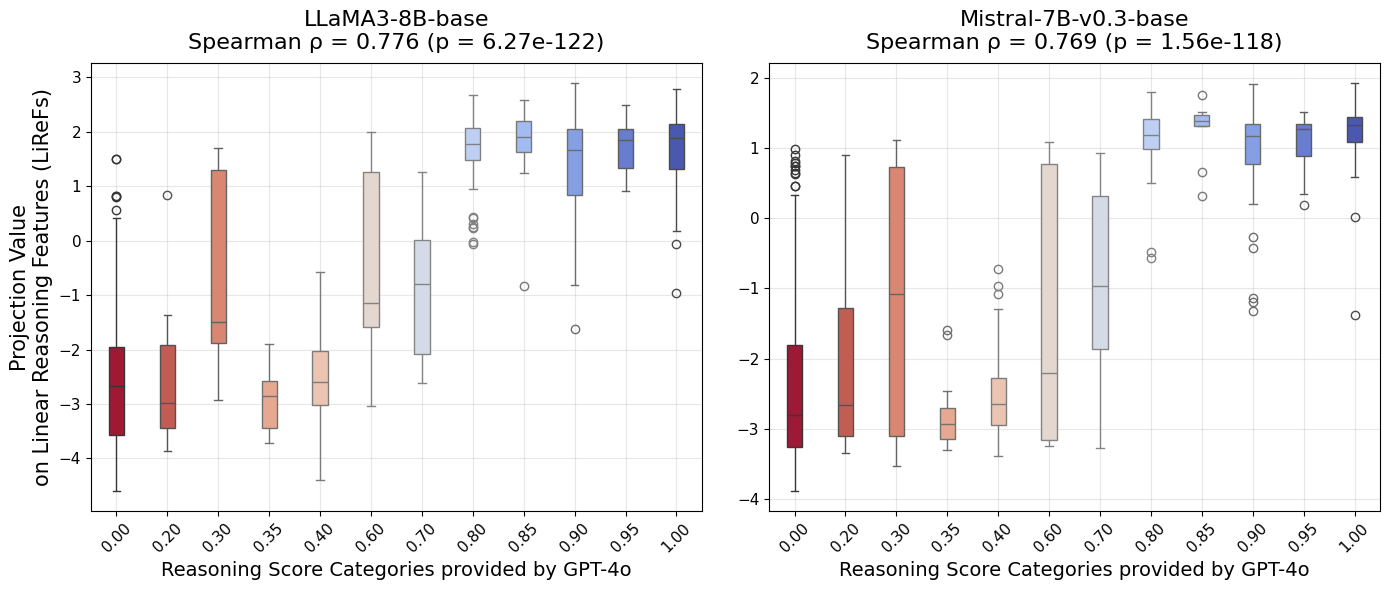

Pearson Correlation on Meta-Llama-3-8B in Layer 19: 0.837, p-value: 1.495e-158
Spearman Correlation: 0.773, p-value: 2.380e-120
Pearson Correlation on Mistral-7B-v0.3 in Layer 19: 0.813, p-value: 2.448e-142
Spearman Correlation: 0.761, p-value: 1.603e-114


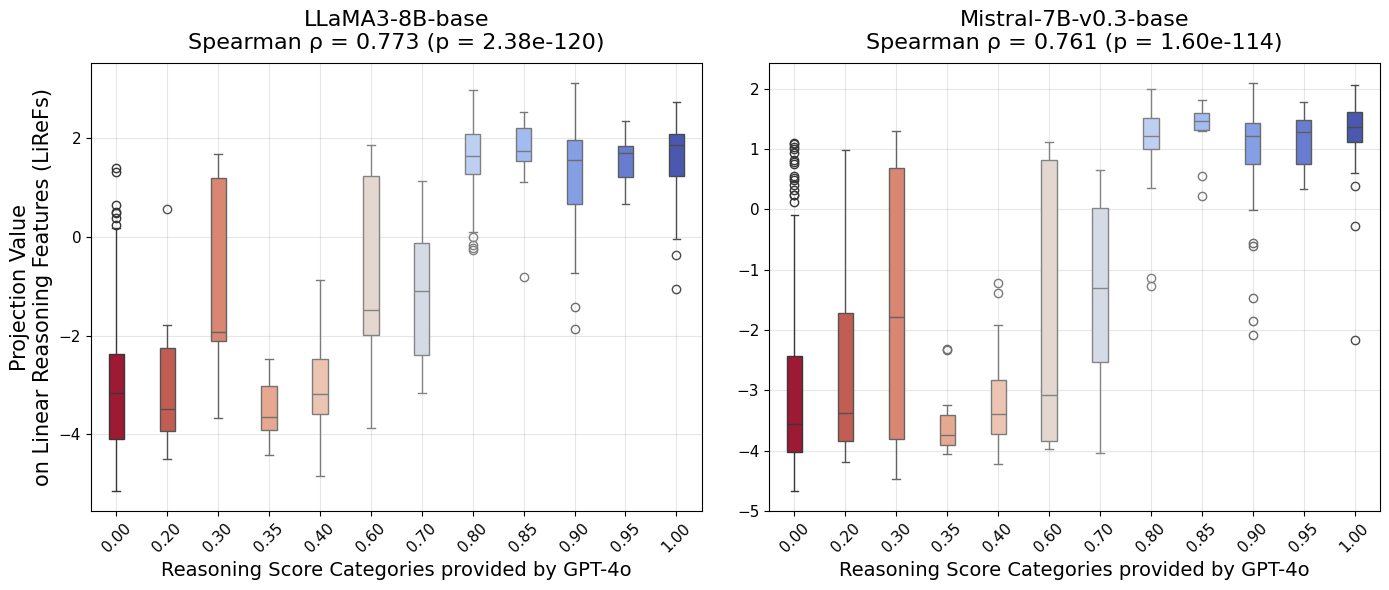

Pearson Correlation on Meta-Llama-3-8B in Layer 20: 0.844, p-value: 1.115e-163
Spearman Correlation: 0.776, p-value: 9.138e-122
Pearson Correlation on Mistral-7B-v0.3 in Layer 20: 0.811, p-value: 1.526e-141
Spearman Correlation: 0.765, p-value: 2.070e-116


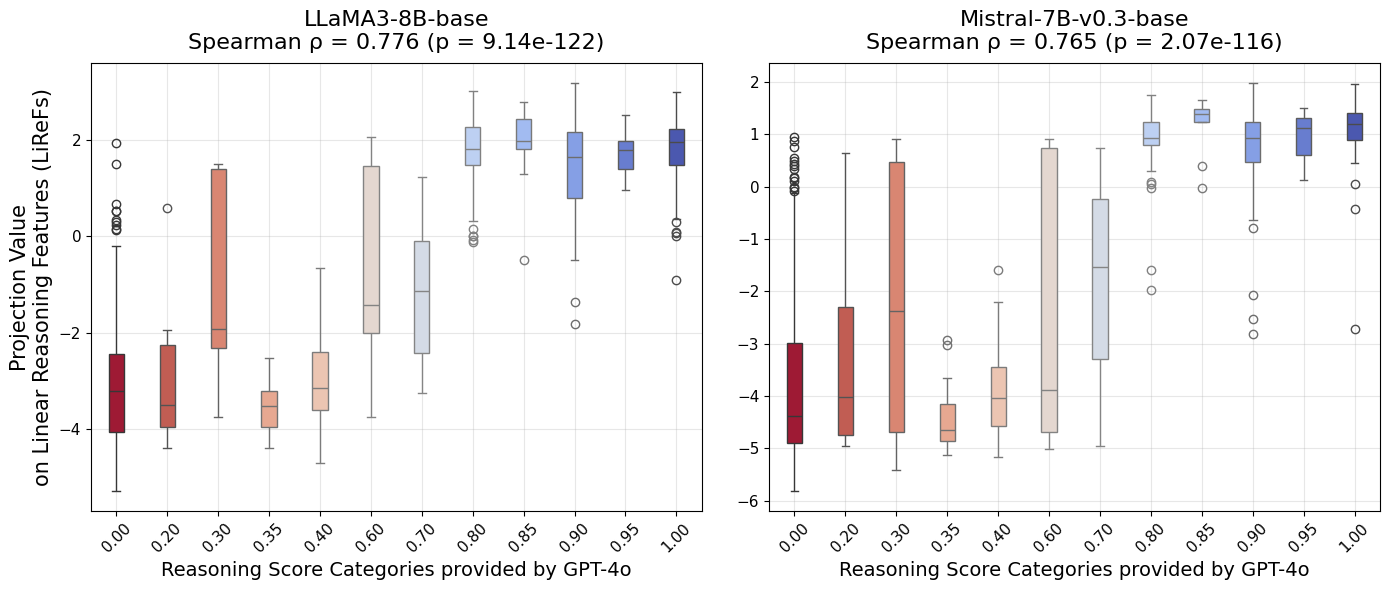

Pearson Correlation on Meta-Llama-3-8B in Layer 21: 0.830, p-value: 1.988e-153
Spearman Correlation: 0.765, p-value: 1.601e-116
Pearson Correlation on Mistral-7B-v0.3 in Layer 21: 0.808, p-value: 2.904e-139
Spearman Correlation: 0.759, p-value: 1.045e-113


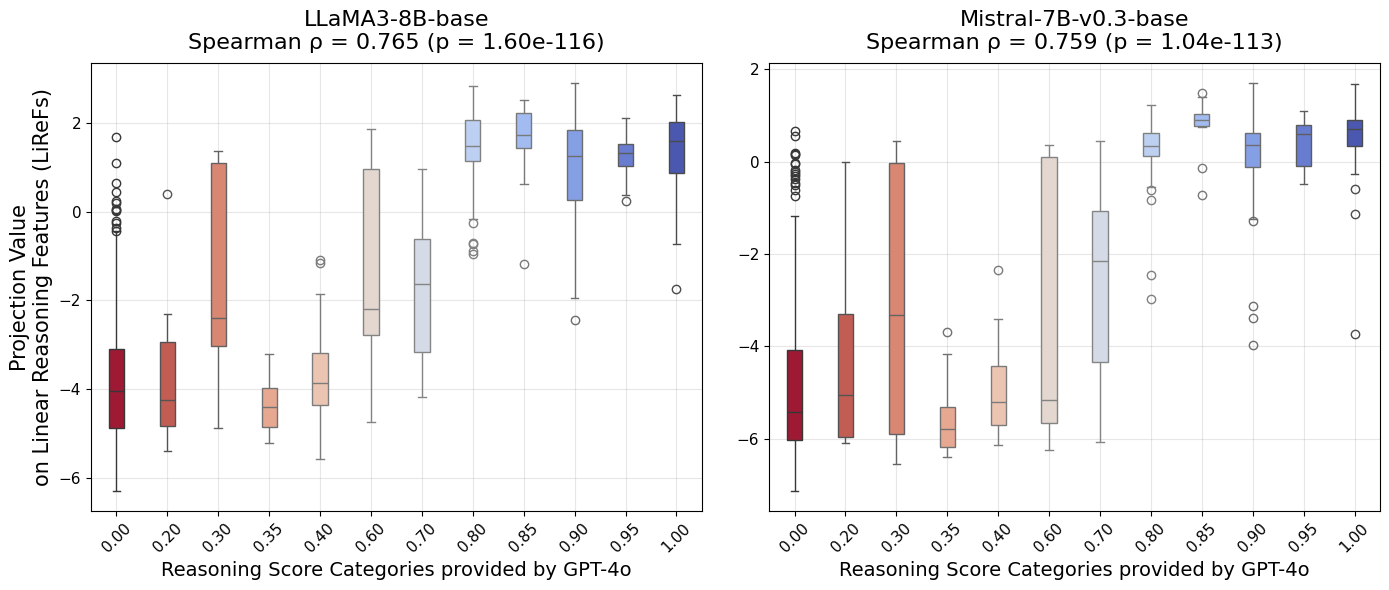

Pearson Correlation on Meta-Llama-3-8B in Layer 22: 0.840, p-value: 3.830e-161
Spearman Correlation: 0.775, p-value: 4.321e-121
Pearson Correlation on Mistral-7B-v0.3 in Layer 22: 0.801, p-value: 2.929e-135
Spearman Correlation: 0.750, p-value: 2.401e-109


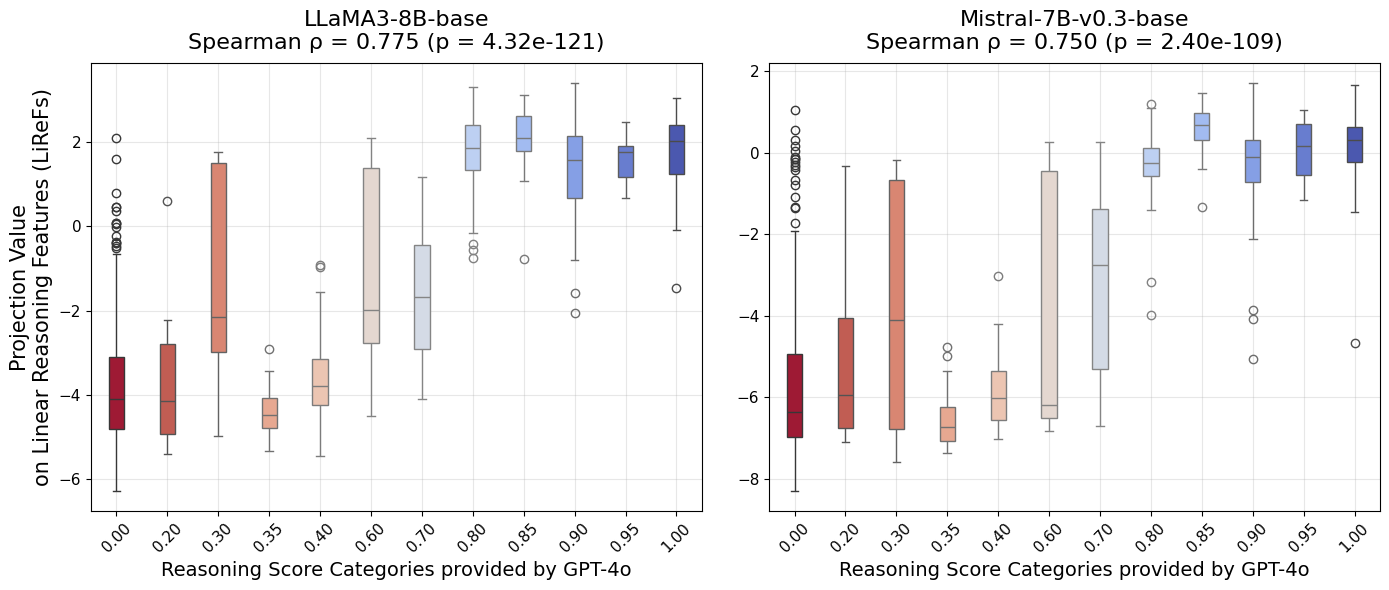

Pearson Correlation on Meta-Llama-3-8B in Layer 23: 0.829, p-value: 9.866e-153
Spearman Correlation: 0.770, p-value: 1.173e-118
Pearson Correlation on Mistral-7B-v0.3 in Layer 23: 0.798, p-value: 1.591e-133
Spearman Correlation: 0.744, p-value: 7.479e-107


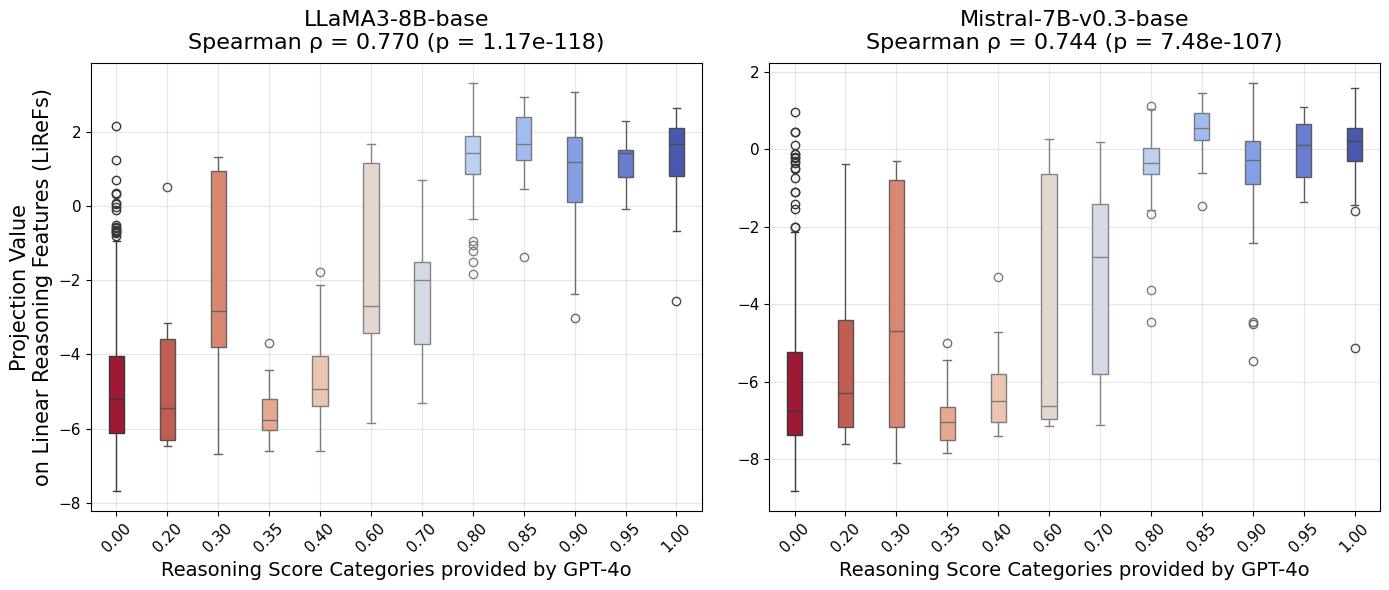

Pearson Correlation on Meta-Llama-3-8B in Layer 24: 0.824, p-value: 2.197e-149
Spearman Correlation: 0.765, p-value: 1.779e-116
Pearson Correlation on Mistral-7B-v0.3 in Layer 24: 0.791, p-value: 8.103e-130
Spearman Correlation: 0.728, p-value: 4.278e-100


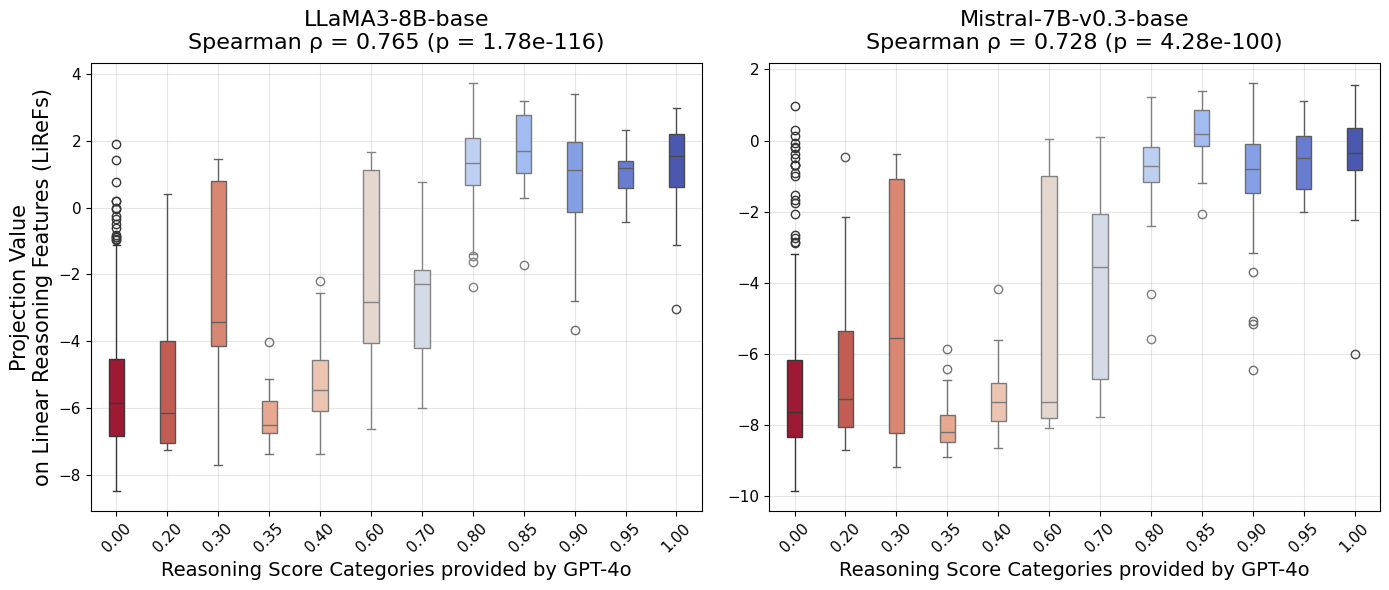

Pearson Correlation on Meta-Llama-3-8B in Layer 25: 0.826, p-value: 4.403e-151
Spearman Correlation: 0.762, p-value: 6.484e-115
Pearson Correlation on Mistral-7B-v0.3 in Layer 25: 0.796, p-value: 1.362e-132
Spearman Correlation: 0.733, p-value: 6.031e-102


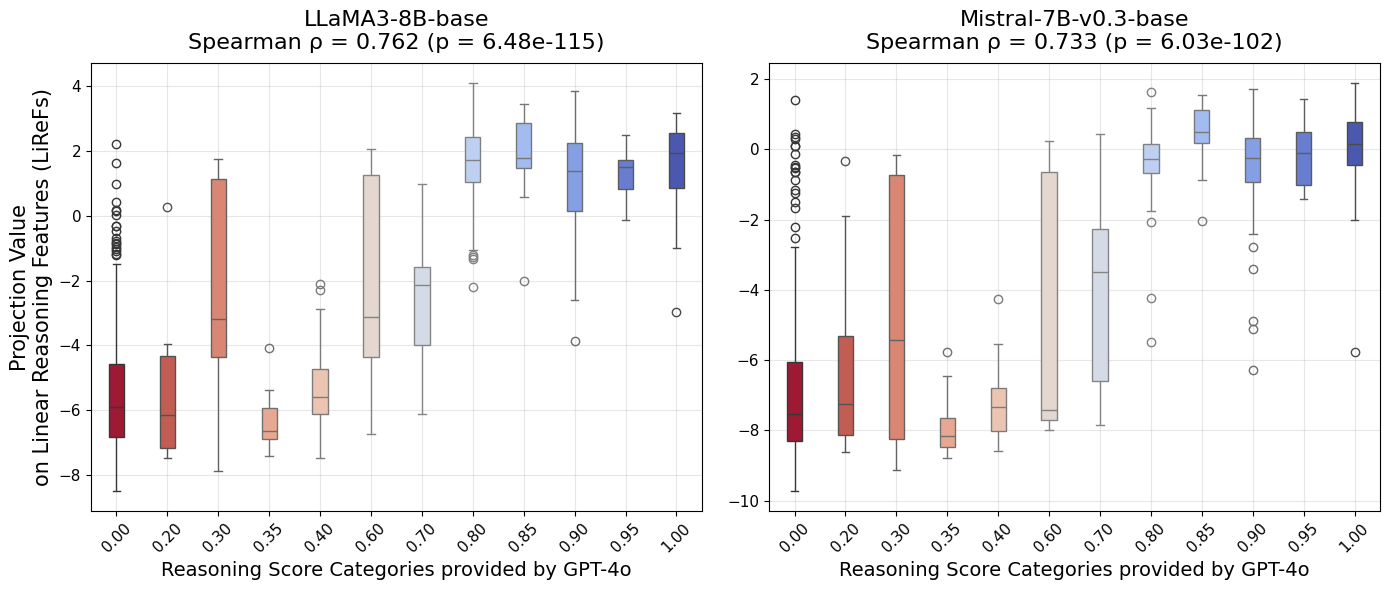

Pearson Correlation on Meta-Llama-3-8B in Layer 26: 0.828, p-value: 3.055e-152
Spearman Correlation: 0.764, p-value: 1.097e-115
Pearson Correlation on Mistral-7B-v0.3 in Layer 26: 0.795, p-value: 8.008e-132
Spearman Correlation: 0.728, p-value: 3.095e-100


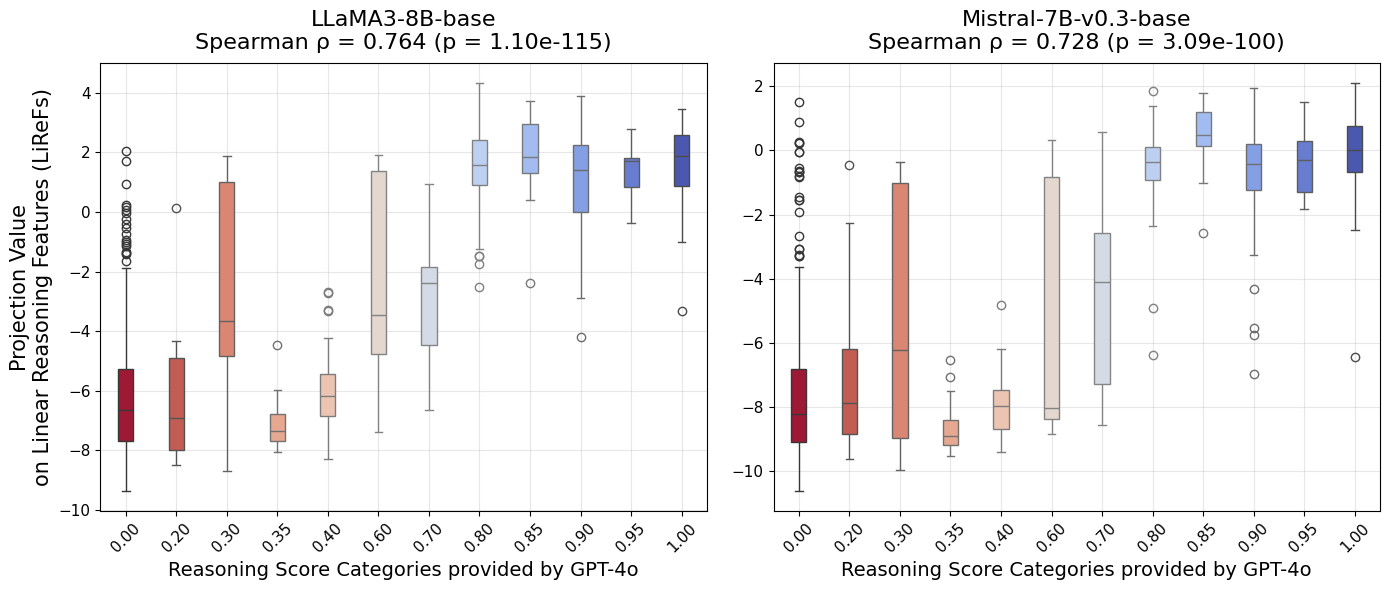

Pearson Correlation on Meta-Llama-3-8B in Layer 27: 0.827, p-value: 5.502e-152
Spearman Correlation: 0.760, p-value: 6.040e-114
Pearson Correlation on Mistral-7B-v0.3 in Layer 27: 0.807, p-value: 4.562e-139
Spearman Correlation: 0.742, p-value: 4.239e-106


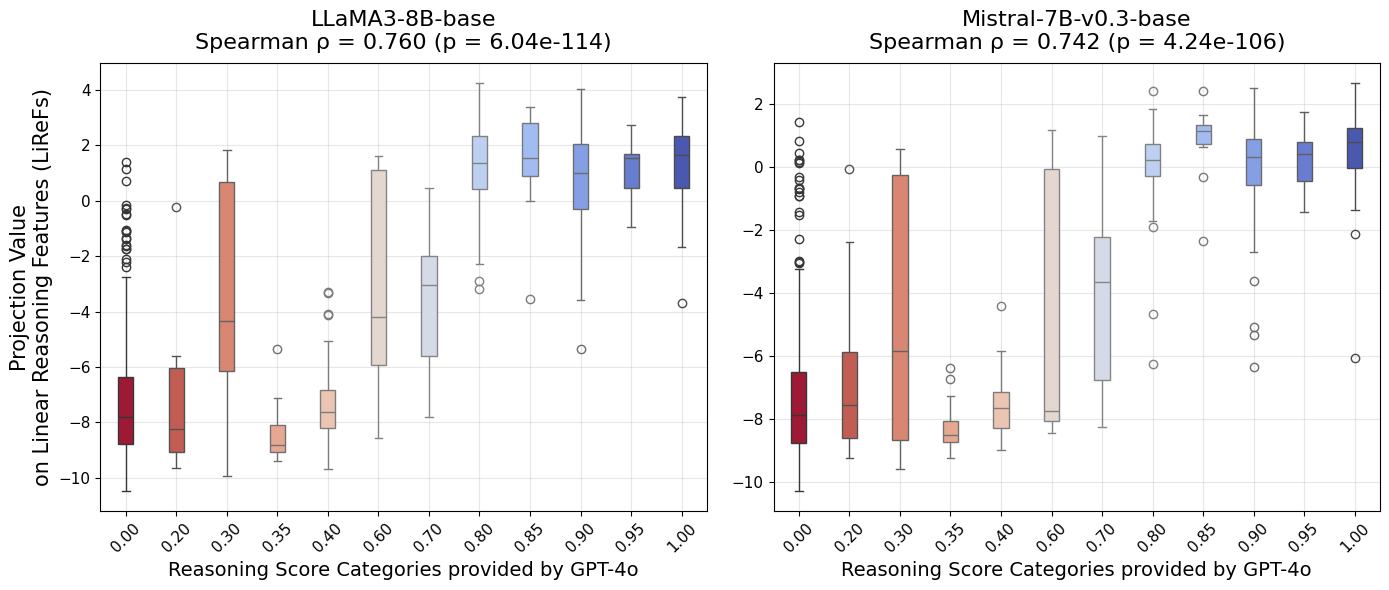

Pearson Correlation on Meta-Llama-3-8B in Layer 28: 0.846, p-value: 1.710e-165
Spearman Correlation: 0.765, p-value: 2.114e-116
Pearson Correlation on Mistral-7B-v0.3 in Layer 28: 0.815, p-value: 1.499e-143
Spearman Correlation: 0.752, p-value: 3.296e-110


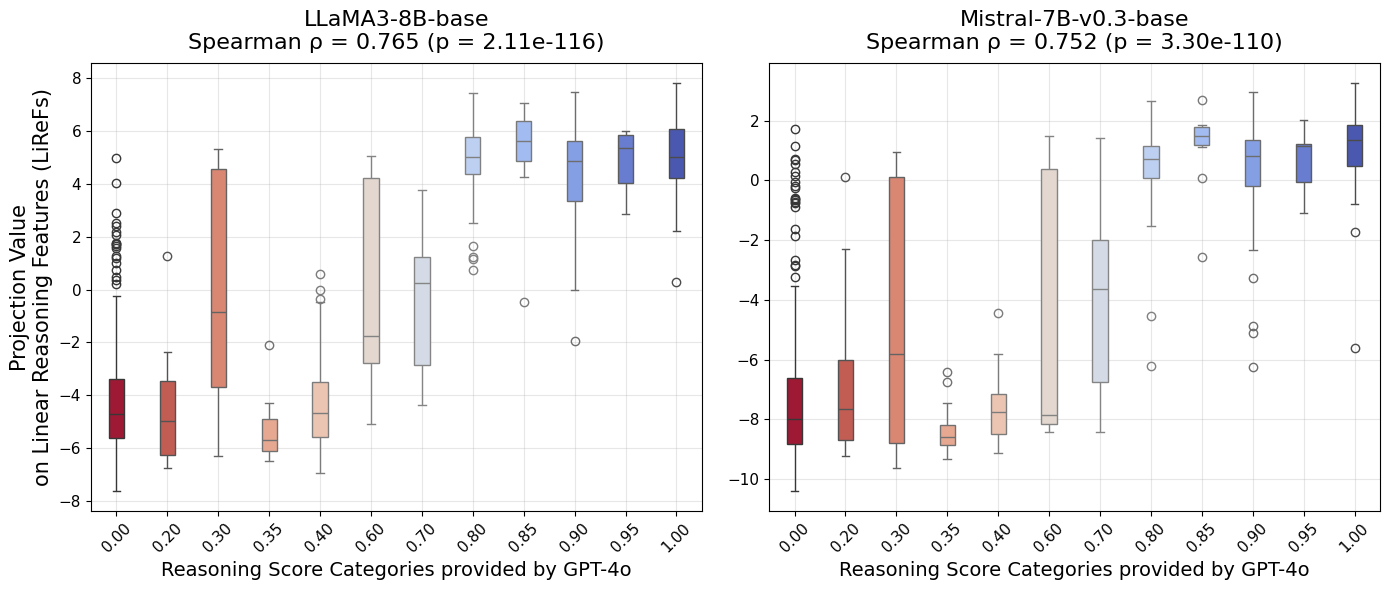

Pearson Correlation on Meta-Llama-3-8B in Layer 29: 0.853, p-value: 2.820e-171
Spearman Correlation: 0.779, p-value: 1.818e-123
Pearson Correlation on Mistral-7B-v0.3 in Layer 29: 0.826, p-value: 1.112e-150
Spearman Correlation: 0.764, p-value: 7.415e-116


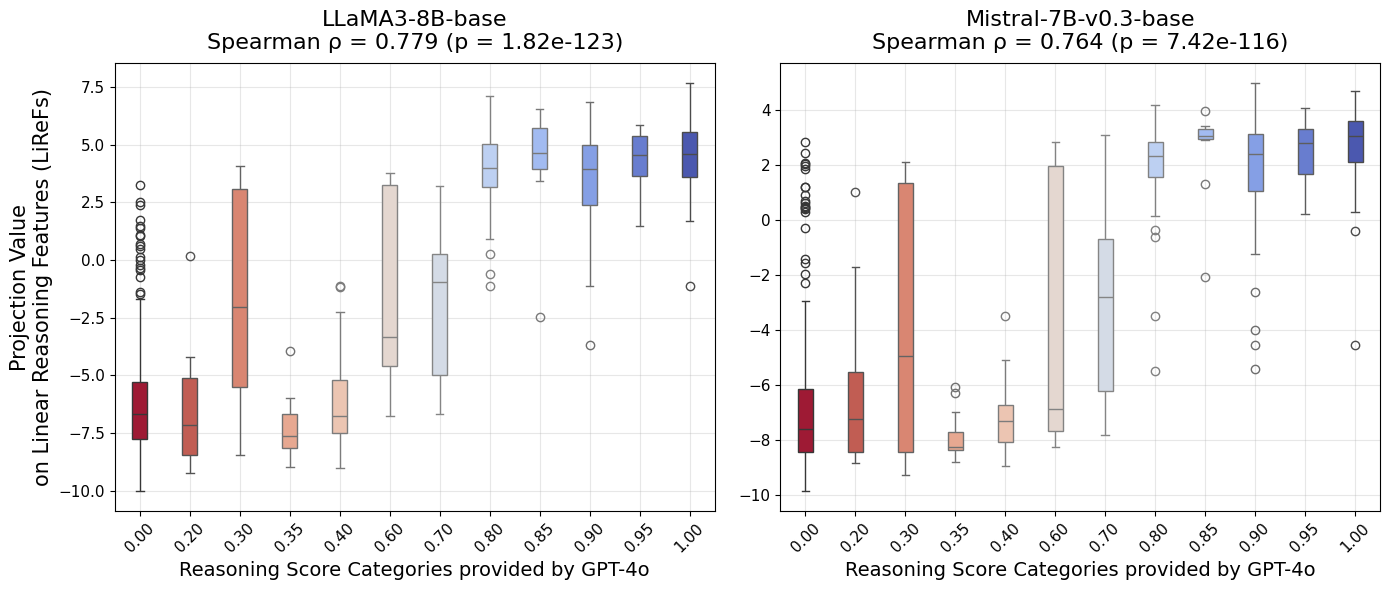

Pearson Correlation on Meta-Llama-3-8B in Layer 30: 0.863, p-value: 1.834e-179
Spearman Correlation: 0.799, p-value: 5.121e-134
Pearson Correlation on Mistral-7B-v0.3 in Layer 30: 0.846, p-value: 7.650e-166
Spearman Correlation: 0.790, p-value: 5.406e-129


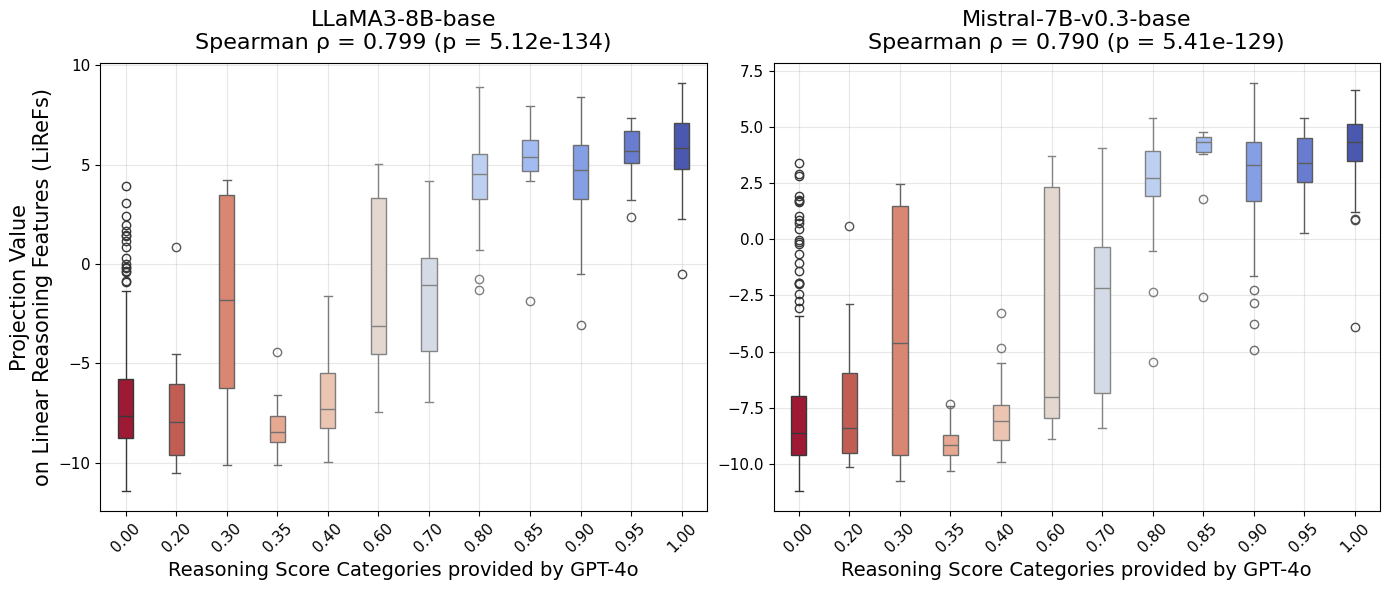

Pearson Correlation on Meta-Llama-3-8B in Layer 31: 0.869, p-value: 4.388e-185
Spearman Correlation: 0.809, p-value: 4.103e-140
Pearson Correlation on Mistral-7B-v0.3 in Layer 31: 0.858, p-value: 3.275e-175
Spearman Correlation: 0.799, p-value: 5.429e-134


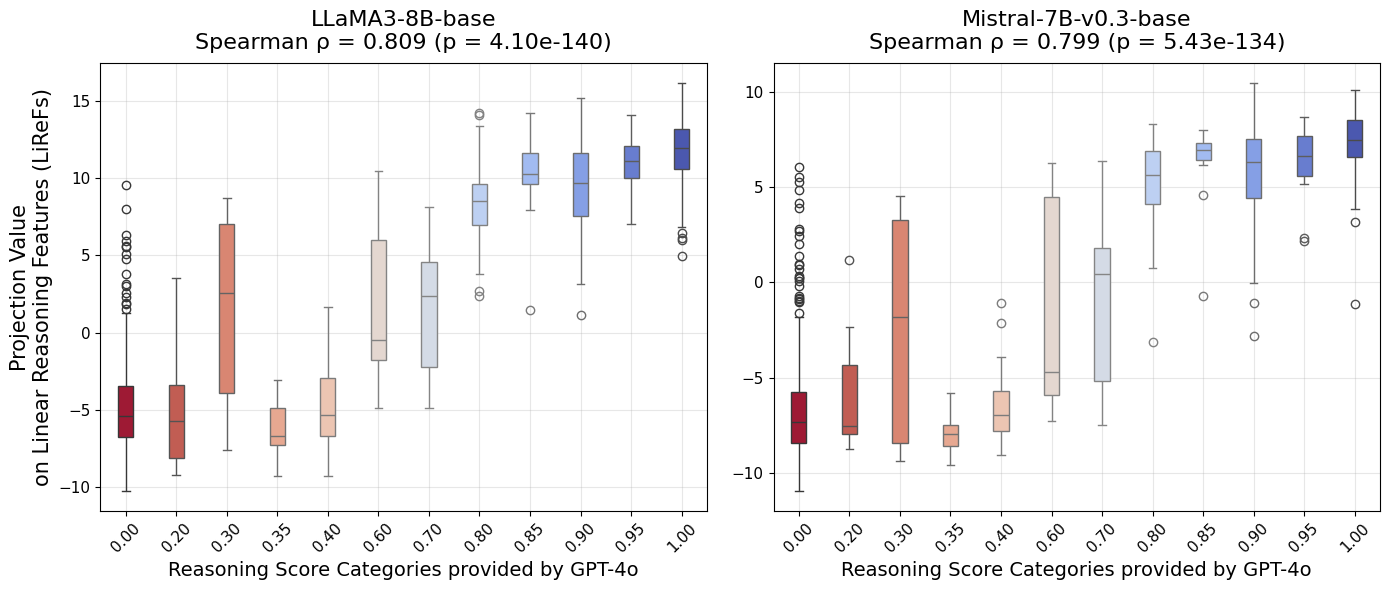

In [ ]:
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


model_list = ['LLaMA3-8B-base', 'Mistral-7B-v0.3-base']

for layer in range(len(loaded_dict['mmlu-pro'])): 
    
    if layer <= 2:
        continue
        
    # 绘制两个子图
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1行2列的子图
    
    # # 添加总标题
    # fig.suptitle(f'Layer {layer} Analysis', fontsize=16, y=1.05)
    
    for ix, model_name in enumerate(model_dict.keys()):
        
        data = model_dict[model_name][layer]
        # 提取数据
        scores = np.array([d['score'] for d in data])
        projections = np.array([d['projection'] for d in data])
        
        # 计算皮尔逊相关系数和p值
        pearson_corr, pearson_p = pearsonr(scores, projections)
        spearman_corr, spearman_p = spearmanr(projections, scores)
        
        print(f"Pearson Correlation on {model_name} in Layer {layer}: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")
        print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")
        
        unique_scores = np.unique(scores)
        n_boxes = len(unique_scores)
        cmap = plt.get_cmap('coolwarm_r')
        colors = [cmap(i/(n_boxes-1)) for i in range(n_boxes)]
        
        # 为每个分数区间创建单独的箱形图
        positions = np.arange(n_boxes)
        for pos, color, score in zip(positions, colors, unique_scores):
            mask = scores == score
            sns.boxplot(x=[pos] * sum(mask), y=projections[mask], 
                       color=color, width=0.3, ax=axs[ix])
        
        # 设置标题和标签
        axs[ix].set_title(f'{model_list[ix]}\nSpearman ρ = {spearman_corr:.3f} (p = {spearman_p:.2e})',
                         fontsize=16, pad=10)
        axs[ix].set_xlabel('Reasoning Score Categories provided by GPT-4o', fontsize=14)
                           
        if ix == 0:
            axs[ix].set_ylabel('Projection Value\non Linear Reasoning Features (LiReFs)', fontsize=15)
        
        # 设置x轴刻度标签
        axs[ix].set_xticks(positions)
        axs[ix].set_xticklabels([f'{score:.2f}' for score in unique_scores], rotation=45)
        
        axs[ix].tick_params(axis='both', labelsize=11)
        
        # 添加网格线
        axs[ix].grid(True, alpha=0.3)
        
        
    # 调整子图之间的间距
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.11)
    
    if layer == 9:
        plt.savefig('spearman_boxplot_on_score_and_projection.pdf', format='pdf', bbox_inches='tight', dpi=300)
        
    plt.show()

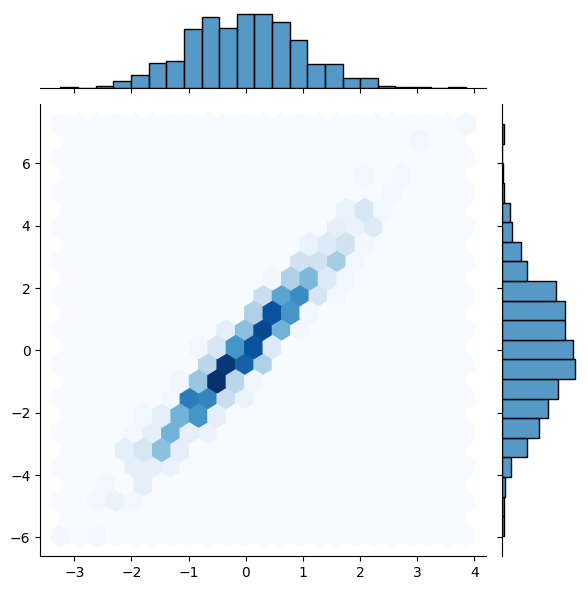

In [ ]:
import seaborn as sns
sns.jointplot(x=projections, y=scores, kind='hex', cmap='Blues')

In [ ]:
!pip install datasets
from datasets import load_dataset

ds = load_dataset("akariasai/PopQA")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


test.tsv:   0%|          | 0.00/5.21M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/14267 [00:00<?, ? examples/s]

In [ ]:
ds.save_to_disk("PopQA")

Saving the dataset (0/1 shards):   0%|          | 0/14267 [00:00<?, ? examples/s]

In [ ]:
!zip -r PopQA.zip PopQA

  adding: PopQA/ (stored 0%)
  adding: PopQA/dataset_dict.json (stored 0%)
  adding: PopQA/test/ (stored 0%)
  adding: PopQA/test/dataset_info.json (deflated 76%)
  adding: PopQA/test/data-00000-of-00001.arrow (deflated 71%)
  adding: PopQA/test/state.json (deflated 37%)
